<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Deep_learning_Life_expectancy/blob/main/Life_expectancy_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment ANN CNN -Akanksha Rawat

a) What are vanishing and exploding gradients? How do they affect neural networks? Explain in detail.

Vanishing Gradient Problem
The vanishing gradient problem occurs during backpropagation when the gradients (partial derivatives of the loss with respect to weights) become very small—especially in deep neural networks.

Cause: This typically happens when using activation functions like sigmoid or tanh, where the derivative is less than 1. When many such small derivatives are multiplied (as in the chain rule), the resulting gradient becomes extremely small.

Effect: Weights in earlier layers are updated very slowly (or not at all), effectively stalling learning in those layers.

Consequence: The network fails to learn deep features, making it hard to train deep networks effectively.

Example: If each derivative is ~0.1 and you have 100 layers, the gradient becomes ~0.1¹⁰⁰ → effectively zero.

Exploding Gradient Problem
The exploding gradient problem is the opposite: gradients become very large during backpropagation.

Cause: This is often due to large weight values or activation functions like ReLU (though ReLU itself isn't the direct cause—it's more about the weights and initialization). When derivatives > 1 are multiplied across many layers, the gradient grows exponentially.

Effect: Weight updates become huge, causing the network to become unstable and possibly diverge (loss goes to infinity or NaN).

Consequence: The model cannot converge, and training fails.

Example: If each derivative is ~2 and you have 100 layers, the gradient becomes 2¹⁰⁰ → extremely large.

Solutions
For vanishing gradients:

Use ReLU, Leaky ReLU, or ELU instead of sigmoid/tanh.

Use Batch Normalization.

Use residual connections (like in ResNet).

Use proper weight initialization (e.g., Xavier or He initialization).

For exploding gradients:

Apply gradient clipping.

Use Batch Normalization.

Monitor and adjust learning rates.

Use proper weight initialization.

b) Use the Life Expectancy Prediction dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab to predict the life expectancy.

https://www.kaggle.com/code/ranasabrii/life-expectancy-regression-with-ann/notebook


i. Download the dataset from above link and load it into your Python environment.

ii. Perform the EDA and do the visualizations.

iii. Check the distributions/skewness in the variables and do the transformations if required.

iv. Check/Treat the outliers and do the feature scaling if required.

v. Build Deep Learning model using ANN with multiple hidden layers.

vi. Apply the dropout regularization and early stopping techniques to improve model performance.

vii. Use the modelCheckpoint also to store the parameters after each epoch.

viii. Use the KerasTuner to tune to best parameters (No. of hidden layers, optimizers, loss function, activation functions etc.)

ix. Compare the accuracies of different models and finalize the best model.

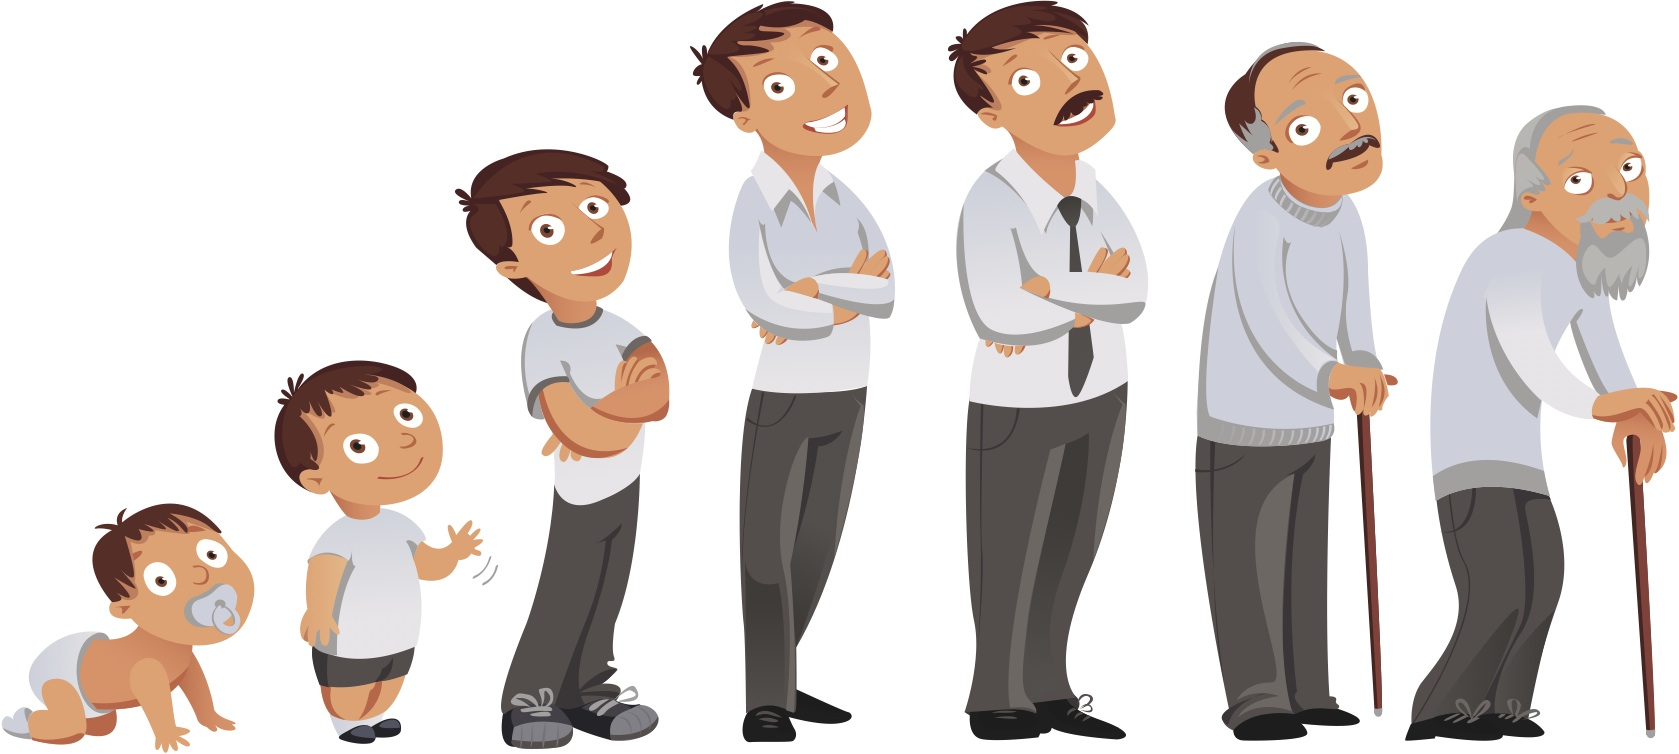

In [1]:
from IPython import display
display.Image('/content/Life-expectancy.jpg')


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d kumarajarshi/life-expectancy-who

Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who
License(s): other
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 369MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/life-expectancy-who.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
%matplotlib inline

In [6]:
df=pd.read_csv('/content/Life Expectancy Data.csv')
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [7]:
df.shape

(2938, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
df.rename(columns={'Life expectancy ':'Life expectancy','Adult Mortality':'Adult mortality','percentage expenditure':'Percentage expenditure','under-five deaths ':'Under-five deaths','Measles ':'Measles', ' BMI ':'BMI'},inplace=True)
df

Country  Year      Status  Life expectancy  Adult mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936            

In [14]:
df.describe().T

count          mean           std  \
Year                             1649.0  2.007841e+03  4.087711e+00   
Life expectancy                  1649.0  6.930230e+01  8.796834e+00   
Adult mortality                  1649.0  1.682153e+02  1.253104e+02   
infant deaths                    1649.0  3.255306e+01  1.208472e+02   
Alcohol                          1649.0  4.533196e+00  4.029189e+00   
Percentage expenditure           1649.0  6.989736e+02  1.759229e+03   
Hepatitis B                      1649.0  7.921771e+01  2.560466e+01   
Measles                          1649.0  2.224494e+03  1.008580e+04   
BMI                              1649.0  3.812862e+01  1.975425e+01   
Under-five deaths                1649.0  4.422013e+01  1.628980e+02   
Polio                            1649.0  8.356458e+01  2.245056e+01   
Total expenditure                1649.0  5.955925e+00  2.299385e+00   
Diphtheria                       1649.0  8.415525e+01  2.157919e+01   
 HIV/AIDS                        1649.0  1.983869e+00  6.032360e+00   
GDP                              1649.0  5.566032e+03  1.147590e+04   
Population                       1649.0  1.465363e+07  7.046039e+07   
 thinness  1-19 years            1649.0  4.850637e+00  4.599228e+00   
 thinness 5-9 years              1649.0  4.907762e+00  4.653757e+00   
Income composition of resources  1649.0  6.315512e-01  1.830887e-01   
Schooling                        1649.0  1.211989e+01  2.795388e+00   

                                        min            25%           50%  \
Year                             2000.00000    2005.000000  2.008000e+03   
Life expectancy                    44.00000      64.400000  7.170000e+01   
Adult mortality                     1.00000      77.000000  1.480000e+02   
infant deaths                       0.00000       1.000000  3.000000e+00   
Alcohol                             0.01000       0.810000  3.790000e+00   
Percentage expenditure              0.00000      37.438577  1.451023e+02   
Hepatitis B                         2.00000      74.000000  8.900000e+01   
Measles                             0.00000       0.000000  1.500000e+01   
BMI                                 2.00000      19.500000  4.370000e+01   
Under-five deaths                   0.00000       1.000000  4.000000e+00   
Polio                               3.00000      81.000000  9.300000e+01   
Total expenditure                   0.74000       4.410000  5.840000e+00   
Diphtheria                          2.00000      82.000000  9.200000e+01   
 HIV/AIDS                           0.10000       0.100000  1.000000e-01   
GDP                                 1.68135     462.149650  1.592572e+03   
Population                         34.00000  191897.000000  1.419631e+06   
 thinness  1-19 years               0.10000       1.600000  3.000000e+00   
 thinness 5-9 years                 0.10000       1.700000  3.200000e+00   
Income composition of resources     0.00000       0.509000  6.730000e-01   
Schooling                           4.20000      10.300000  1.230000e+01   

                                          75%           max  
Year                             2.011000e+03  2.015000e+03  
Life expectancy                  7.500000e+01  8.900000e+01  
Adult mortality                  2.270000e+02  7.230000e+02  
infant deaths                    2.200000e+01  1.600000e+03  
Alcohol                          7.340000e+00  1.787000e+01  
Percentage expenditure           5.093900e+02  1.896135e+04  
Hepatitis B                      9.600000e+01  9.900000e+01  
Measles                          3.730000e+02  1.314410e+05  
BMI                              5.580000e+01  7.710000e+01  
Under-five deaths                2.900000e+01  2.100000e+03  
Polio                            9.700000e+01  9.900000e+01  
Total expenditure                7.470000e+00  1.439000e+01  
Diphtheria                       9.700000e+01  9.900000e+01  
 HIV/AIDS                        7.000000e-01  5.060000e+01  
GDP            

In [15]:
df.select_dtypes(include=['float64','int64']).corr()

Year  Life expectancy  Adult mortality  \
Year                             1.000000         0.050771        -0.037092   
Life expectancy                  0.050771         1.000000        -0.702523   
Adult mortality                 -0.037092        -0.702523         1.000000   
infant deaths                    0.008029        -0.169074         0.042450   
Alcohol                         -0.113365         0.402718        -0.175535   
Percentage expenditure           0.069553         0.409631        -0.237610   
Hepatitis B                      0.114897         0.199935        -0.105225   
Measles                         -0.053822        -0.068881        -0.003967   
BMI                              0.005739         0.542042        -0.351542   
Under-five deaths                0.010479        -0.192265         0.060365   
Polio                           -0.016699         0.327294        -0.199853   
Total expenditure                0.059493         0.174718        -0.085227   
Diphtheria                       0.029641         0.341331        -0.191429   
 HIV/AIDS                       -0.123405        -0.592236         0.550691   
GDP                              0.096421         0.441322        -0.255035   
Population                       0.012567        -0.022305        -0.015012   
 thinness  1-19 years            0.019757        -0.457838         0.272230   
 thinness 5-9 years              0.014122        -0.457508         0.286723   
Income composition of resources  0.122892         0.721083        -0.442203   
Schooling                        0.088732         0.727630        -0.421171   

                                 infant deaths   Alcohol  \
Year                                  0.008029 -0.113365   
Life expectancy                      -0.169074  0.402718   
Adult mortality                       0.042450 -0.175535   
infant deaths                         1.000000 -0.106217   
Alcohol                              -0.106217  1.000000   
Percentage expenditure               -0.090765  0.417047   
Hepatitis B                          -0.231769  0.109889   
Measles                               0.532680 -0.050110   
BMI                                  -0.234425  0.353396   
Under-five deaths                     0.996906 -0.101082   
Polio                                -0.156929  0.240315   
Total expenditure                    -0.146951  0.214885   
Diphtheria                           -0.161871  0.242951   
 HIV/AIDS                             0.007712 -0.027113   
GDP                                  -0.098092  0.443433   
Population                            0.671758 -0.028880   
 thinness  1-19 years                 0.463415 -0.403755   
 thinness 5-9 years                   0.461908 -0.386208   
Income composition of resources      -0.134754  0.561074   
Schooling                            -0.214372  0.616975   

                                 Percentage expenditure  Hepatitis B  \
Year                                           0.069553     0.114897   
Life expectancy                                0.409631     0.199935   
Adult mortality                               -0.237610    -0.105225   
infant deaths                                 -0.090765    -0.231769   
Alcohol                                        0.417047     0.109889   
Percentage expenditure                         1.000000     0.016760   
Hepatitis B                                    0.016760     1.000000   
Measles                                       -0.063071    -0.124800   
BMI                                            0.242738     0.143302   
Under-five deaths                             -0.092158    -0.240766   
Polio                                          0.128626     0.463331   
Total expenditure                              0.183872     0.113327   
Diphtheria                                     0.134813     0.588990   
 HIV/AIDS                                     -0.095085    -0.094802   
GDP                                 

From correlation matrix, life expectancy is positively correlated with BMI,GDP, Income composition of resources and scholling.

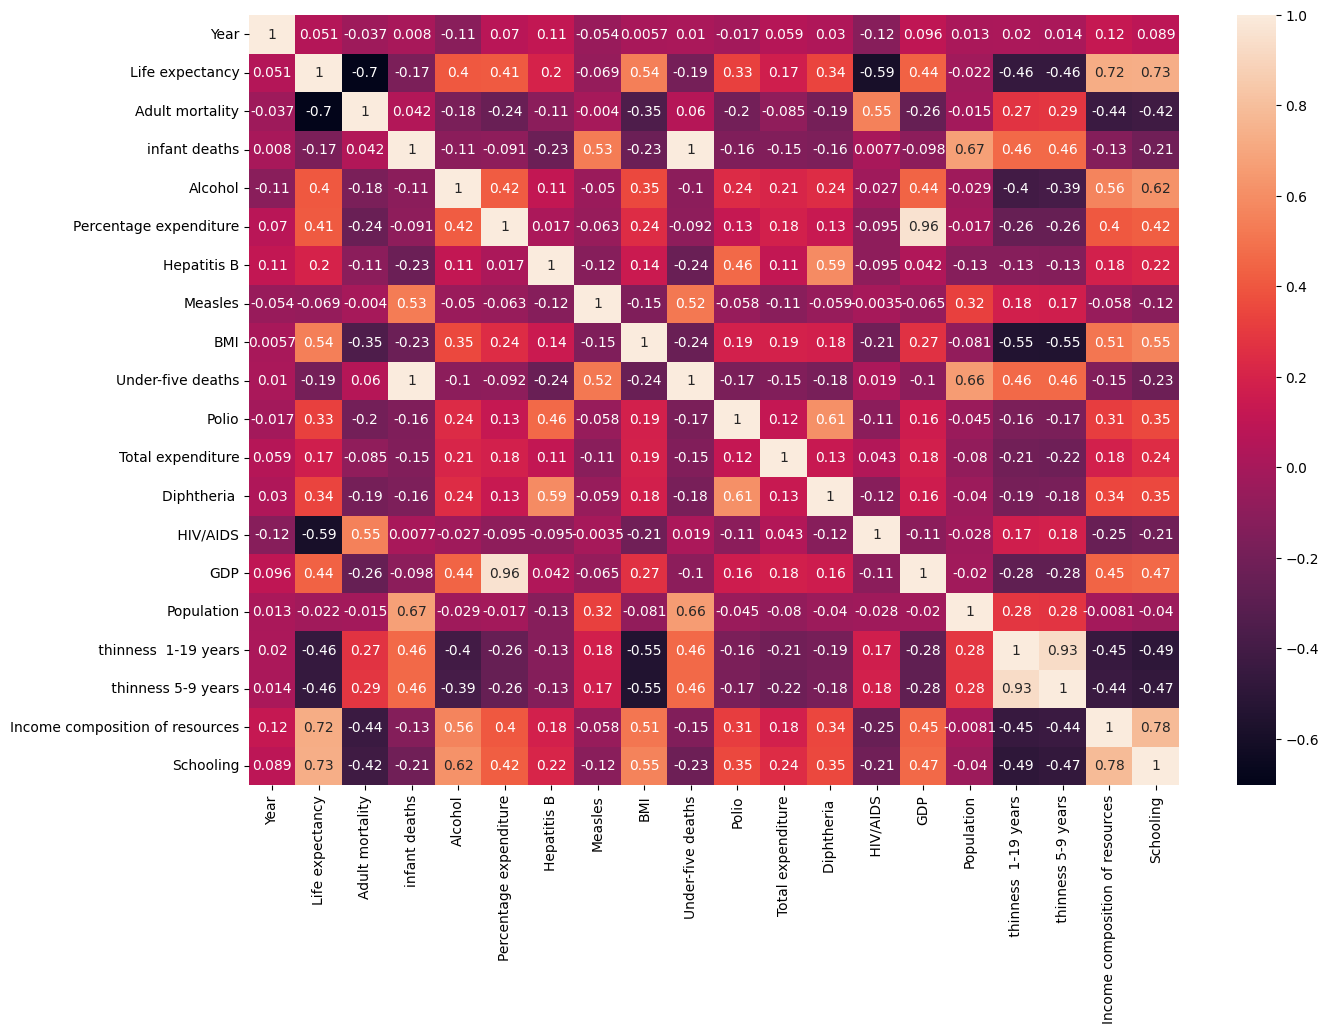

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),annot=True)
plt.show()

Data visualization

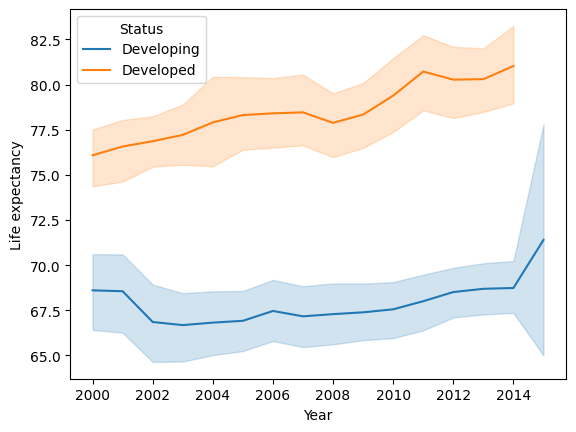

In [17]:
sns.lineplot(data=df,x='Year',y='Life expectancy', hue='Status')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.show()

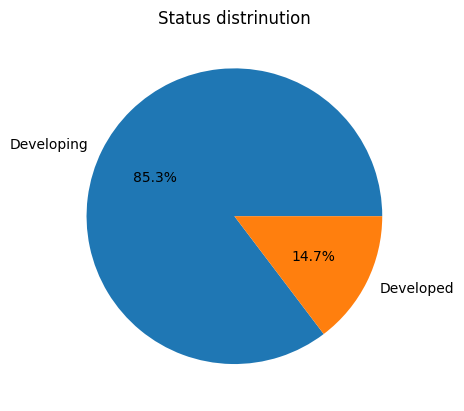

In [18]:
# Total deveploved and developing countries distribution
data=df['Status'].value_counts()
plt.pie(data.values,labels=data.index,autopct='%1.1f%%')
plt.title('Status distrinution')
plt.show()

In [19]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

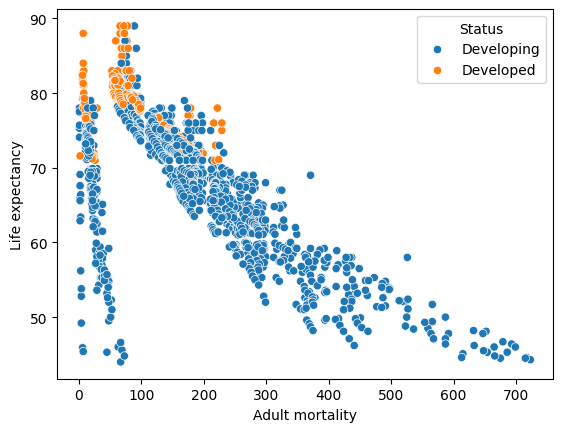

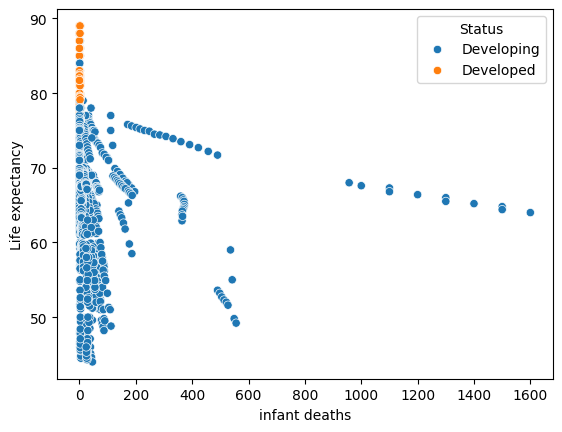

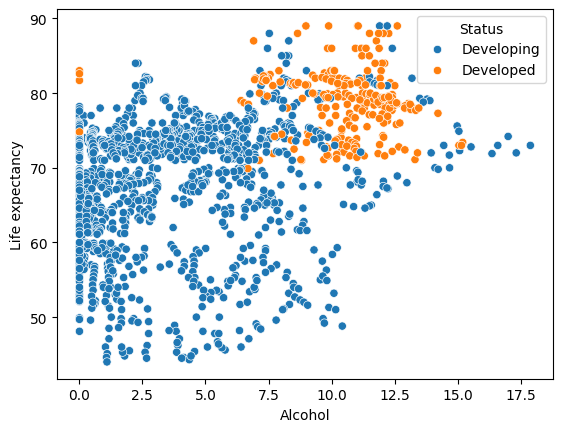

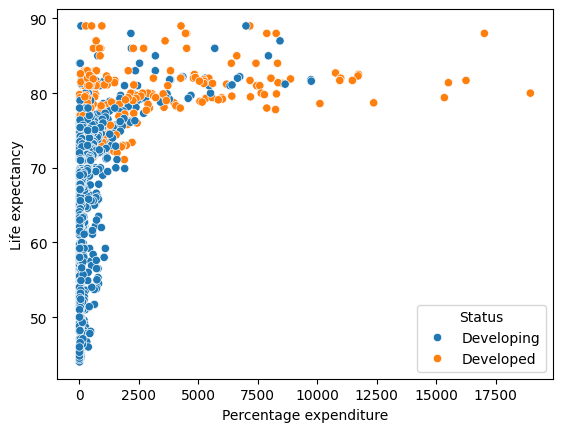

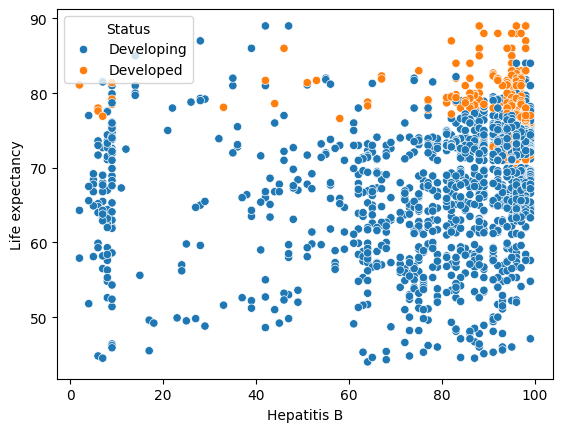

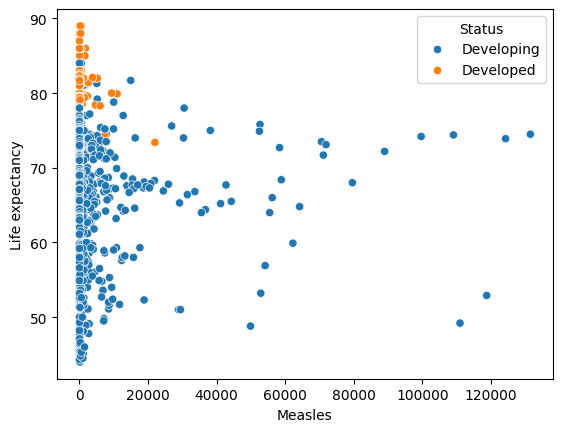

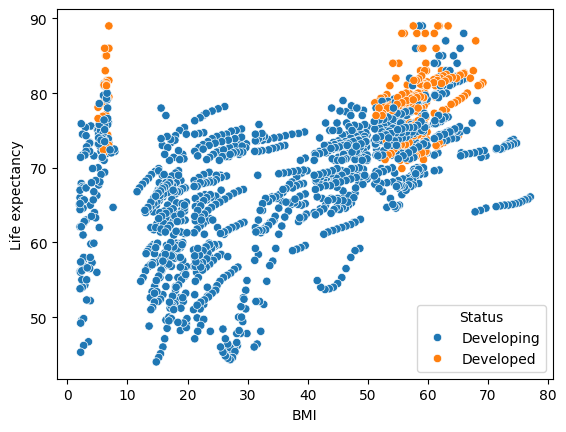

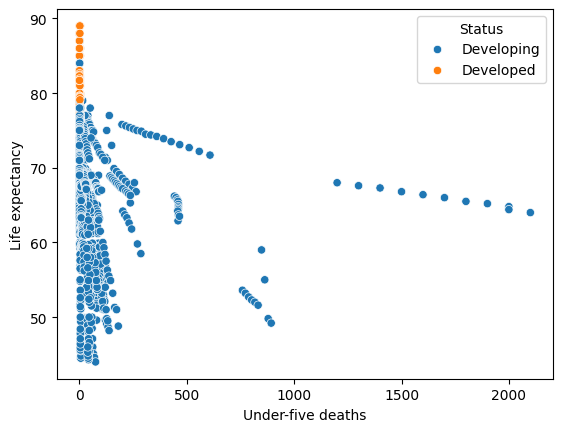

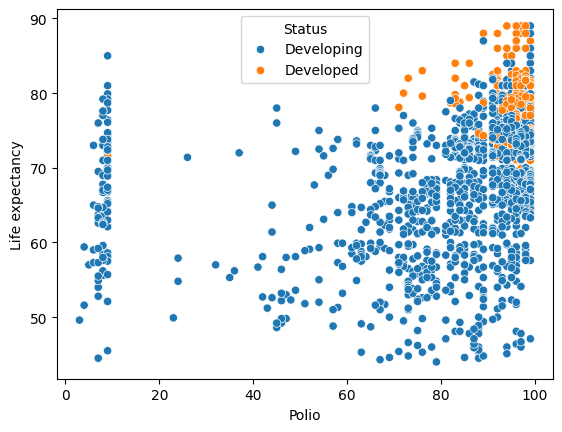

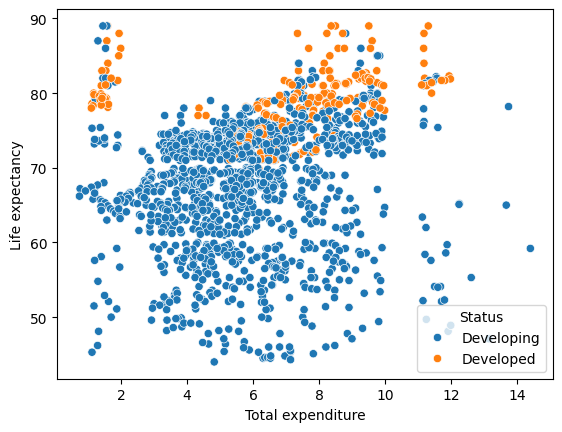

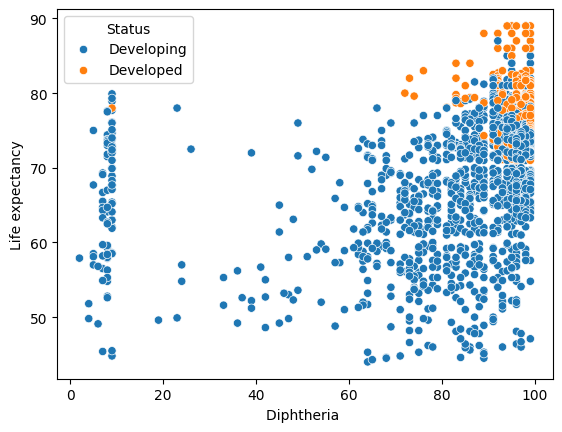

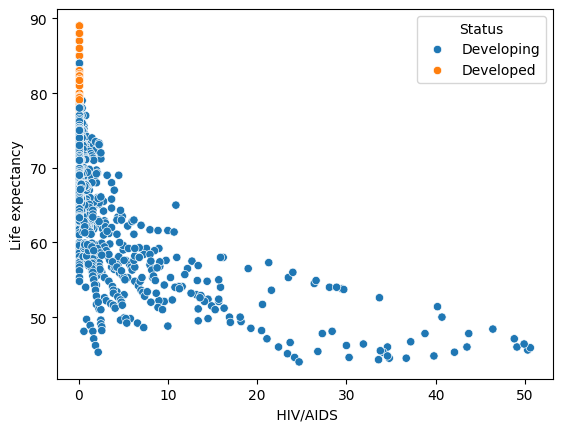

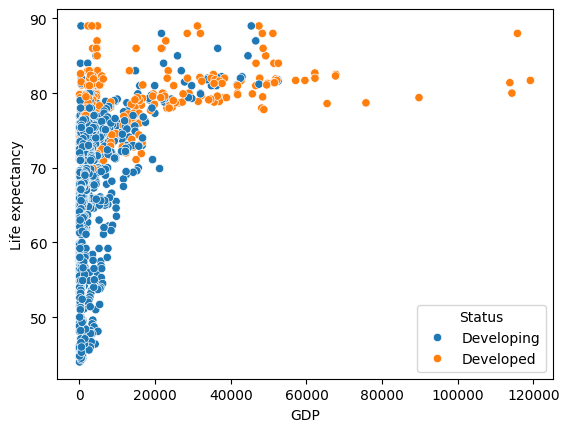

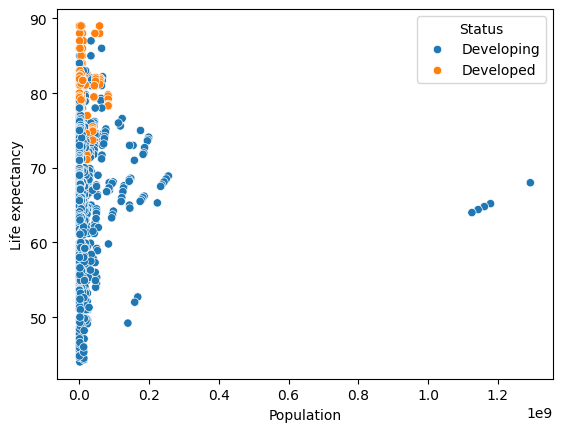

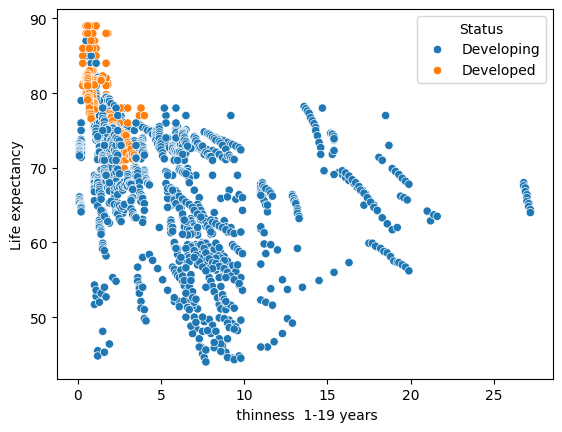

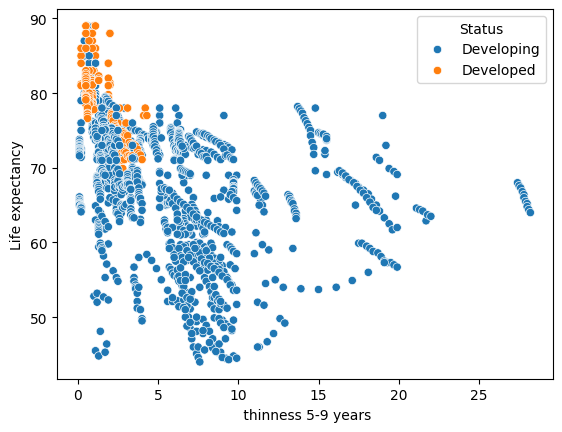

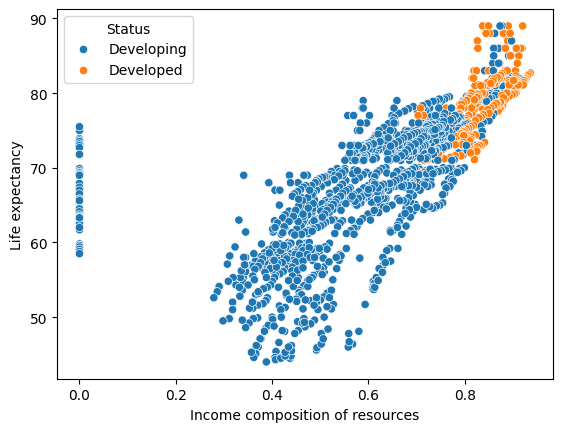

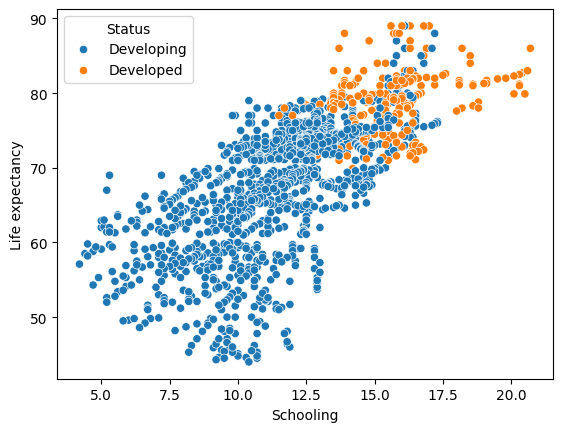

In [20]:
col=[ 'Adult mortality','infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
for i in col:
 sns.scatterplot(data=df,x=i,y='Life expectancy', hue='Status')
 plt.xlabel(i)
 plt.ylabel('Life expectancy')
 plt.show()

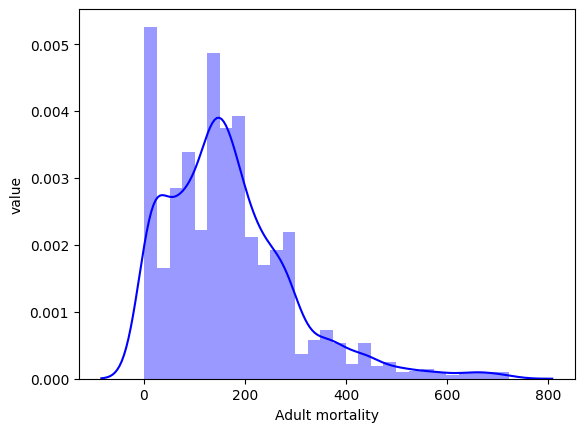

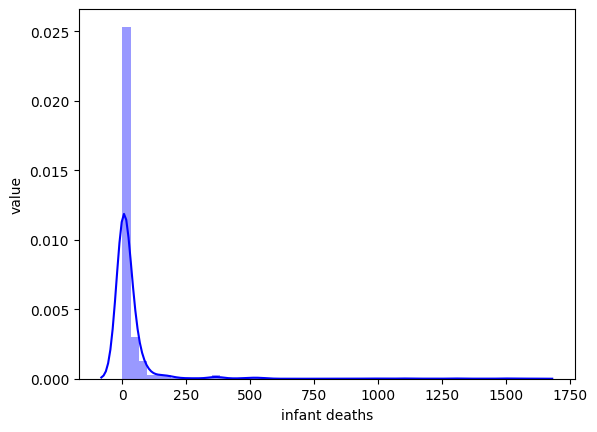

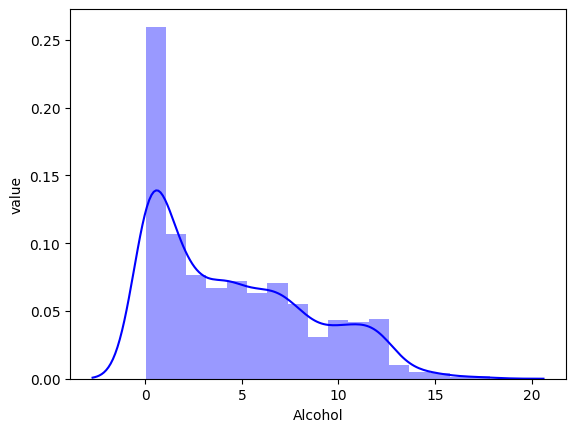

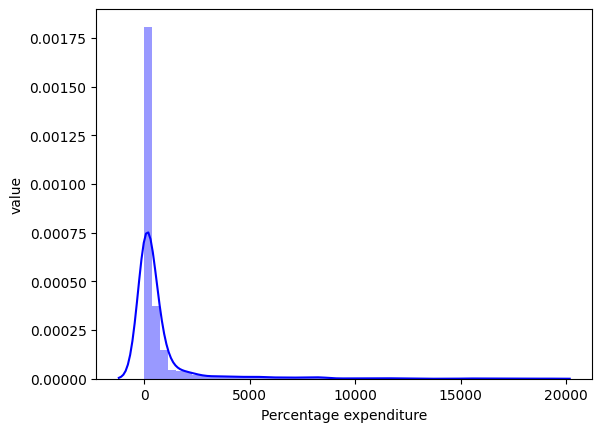

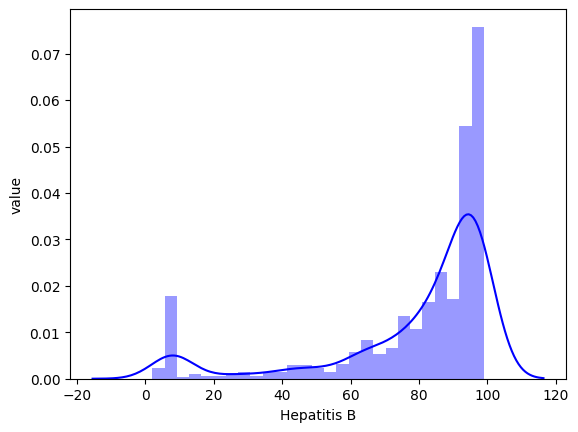

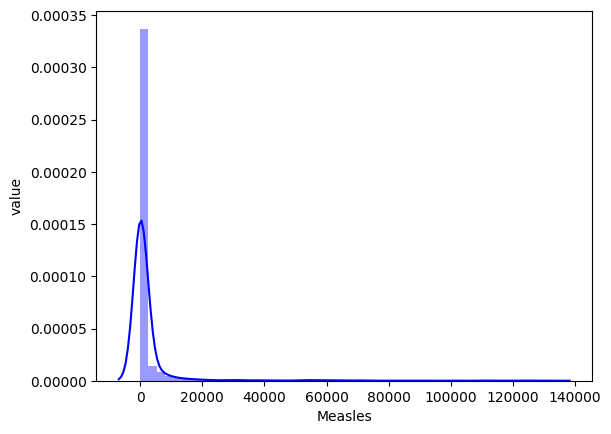

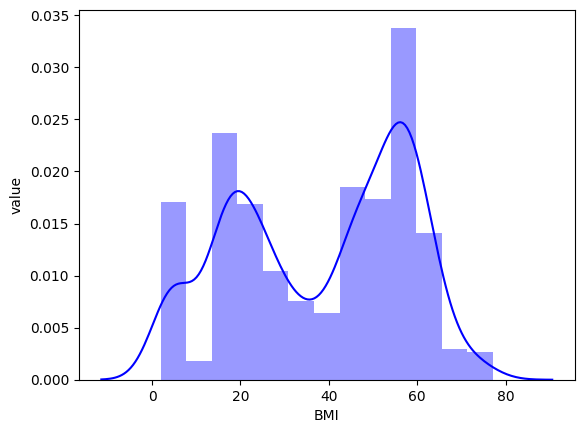

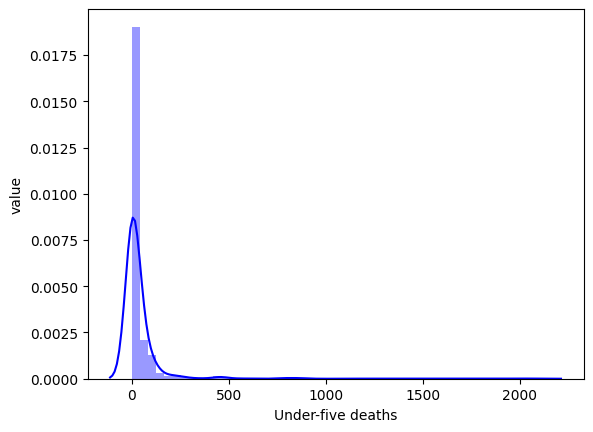

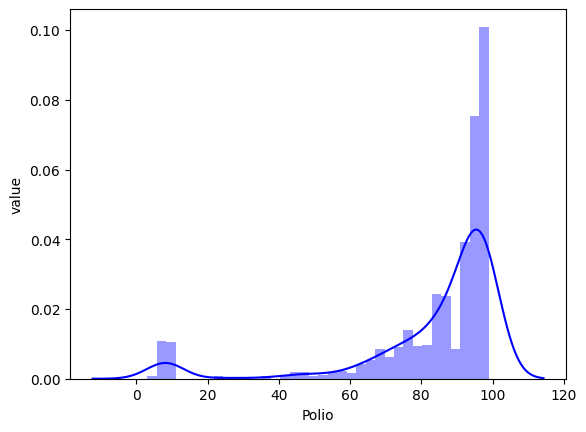

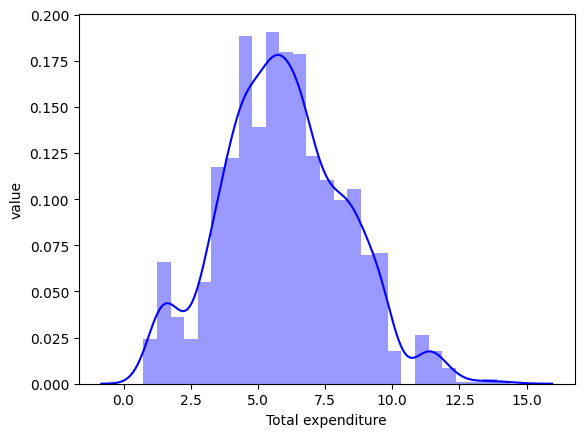

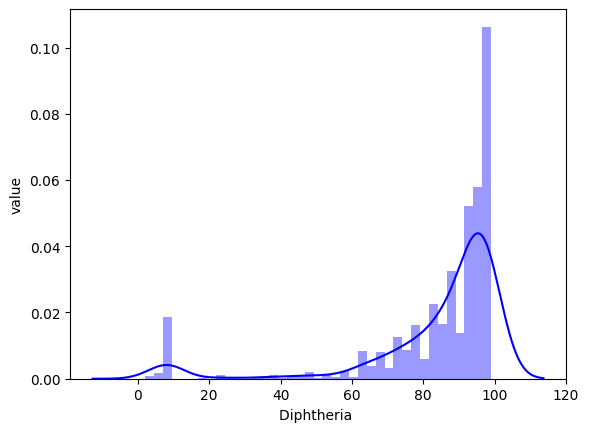

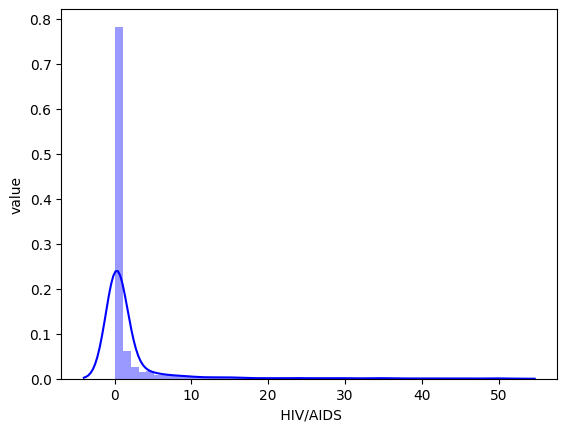

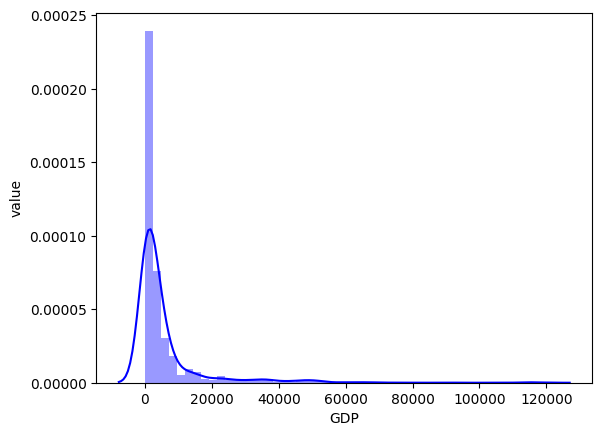

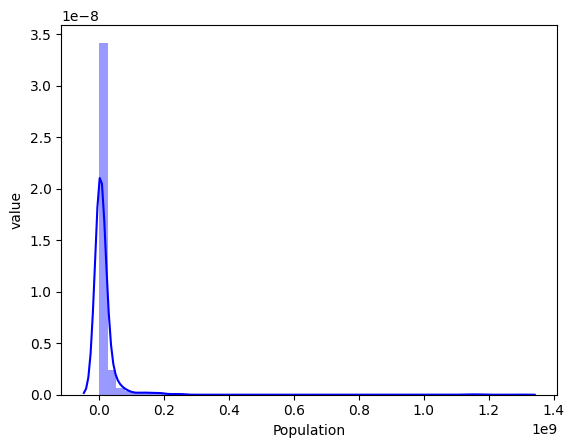

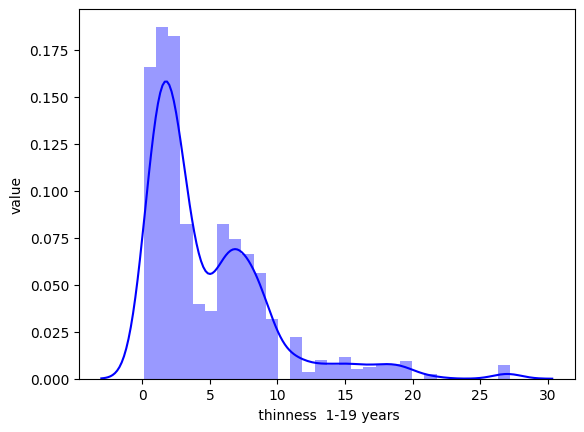

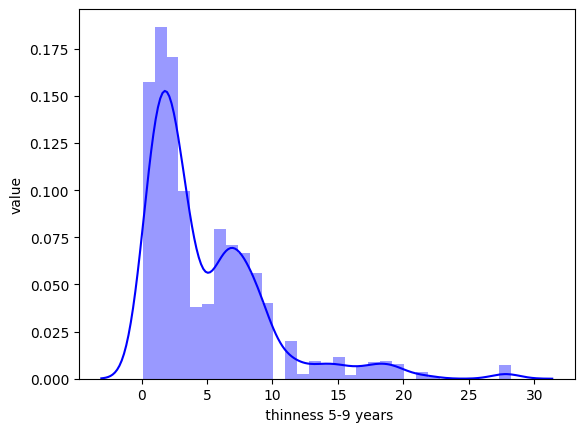

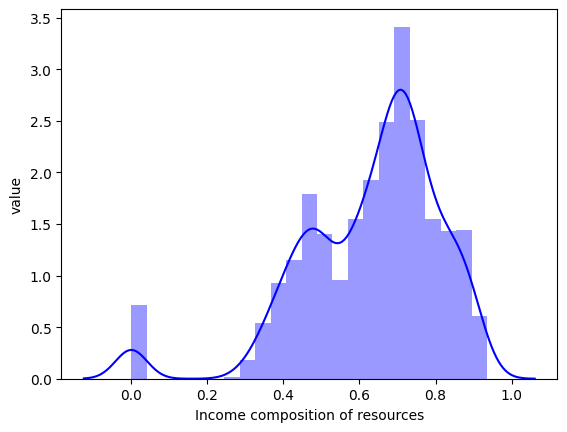

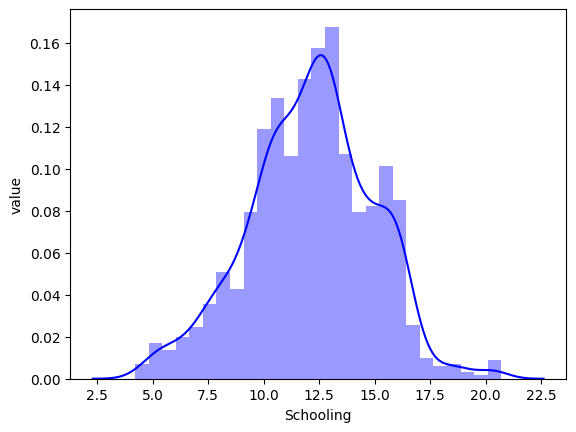

In [21]:
df1=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
for i in df1.columns:
  sns.distplot(df1[i],color='blue')
  plt.xlabel(i)
  plt.ylabel('value')
  plt.show()

VIF

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
v=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
vif = pd.DataFrame({'variables':v.columns})
vif['vif']=[variance_inflation_factor(v.values,i) for i in range (len(v.columns))]
vif


variables         vif
0                   Adult mortality    4.160178
1                     infant deaths  222.073491
2                           Alcohol    4.070163
3            Percentage expenditure   14.825787
4                       Hepatitis B   17.396978
5                           Measles    1.571070
6                               BMI    8.287476
7                 Under-five deaths  210.862351
8                             Polio   24.893553
9                 Total expenditure    8.139036
10                      Diphtheria    33.100694
11                         HIV/AIDS    1.632647
12                              GDP   16.554311
13                       Population    2.013897
14             thinness  1-19 years   15.792641
15               thinness 5-9 years   15.953887
16  Income composition of resources   37.383260
17                        Schooling   56.738013

At this point, we are not considering the variable removal based on the vif.

Outliers

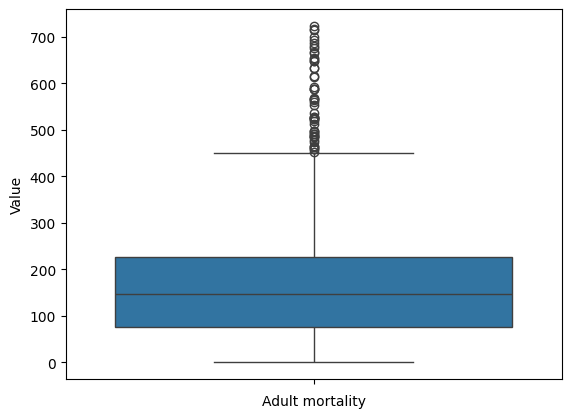

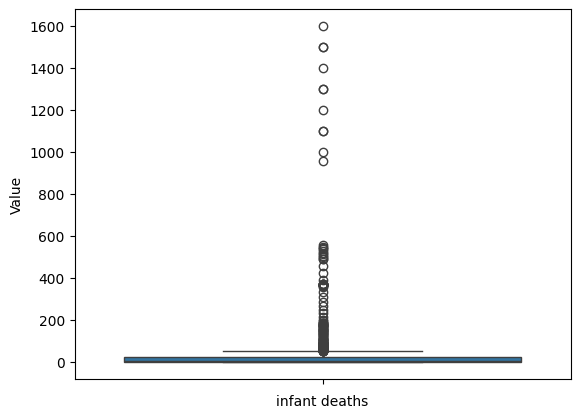

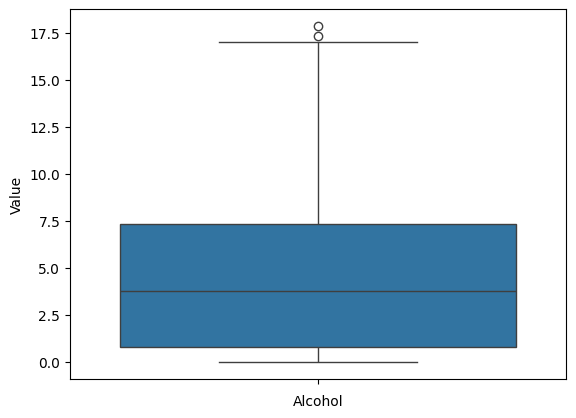

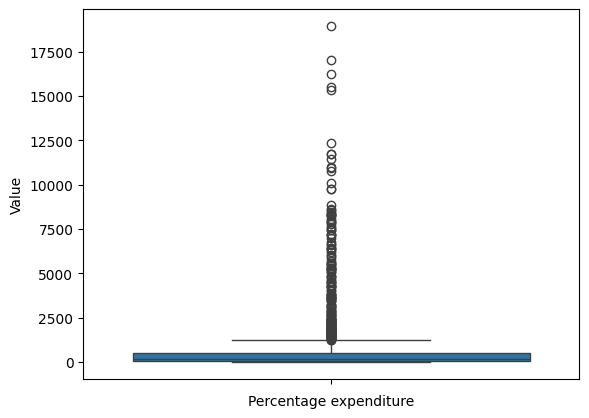

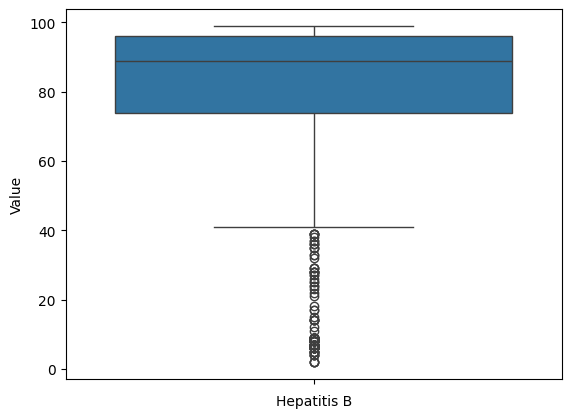

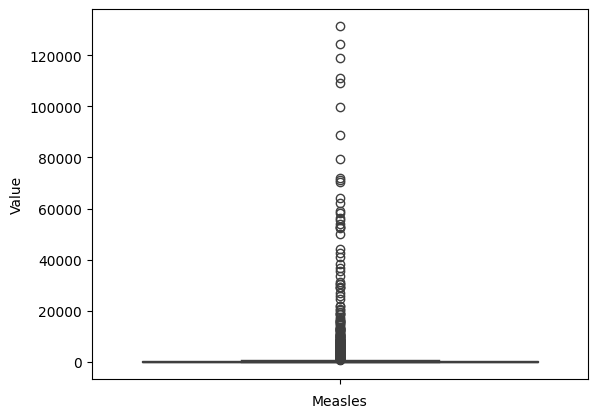

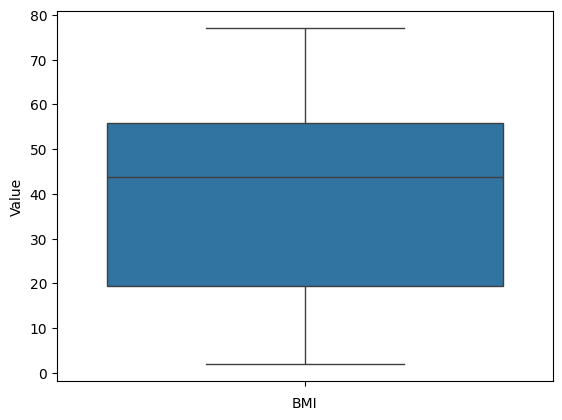

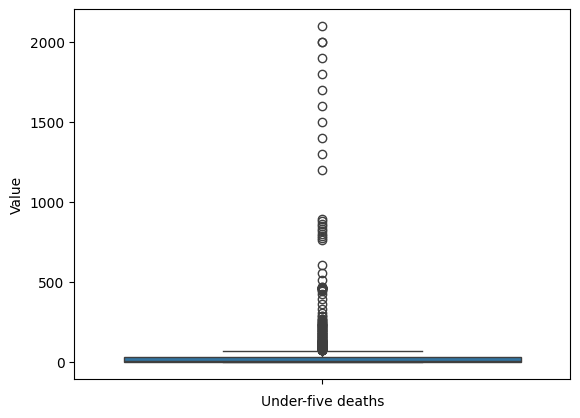

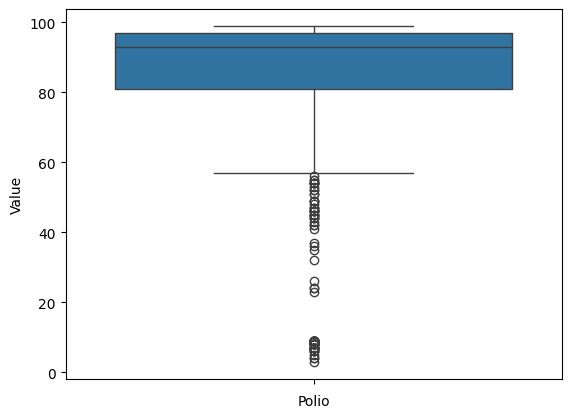

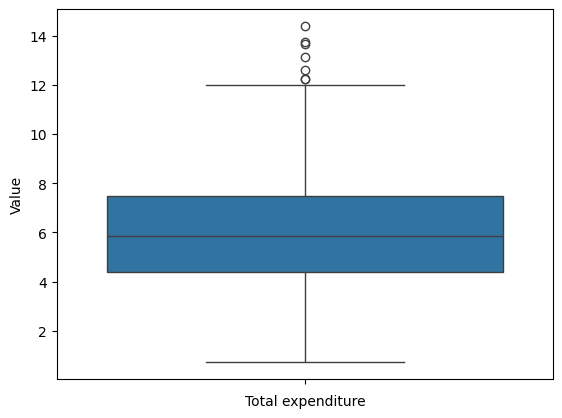

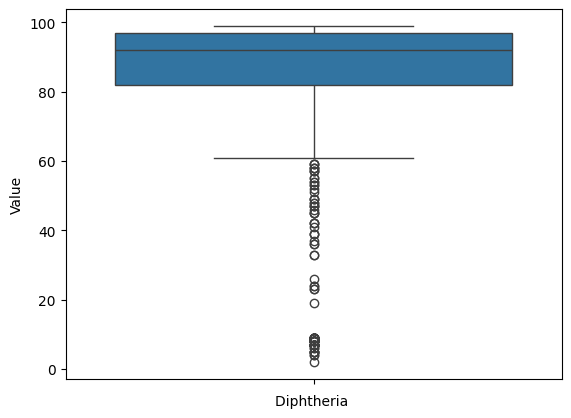

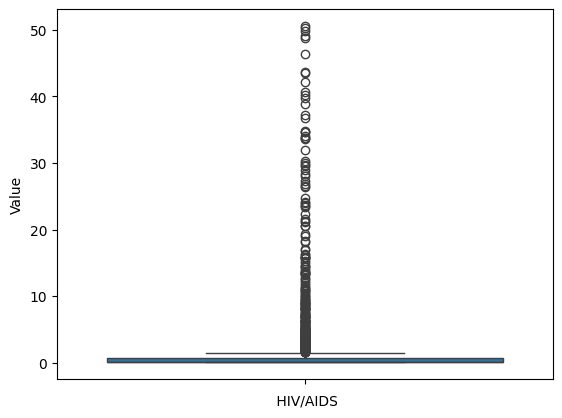

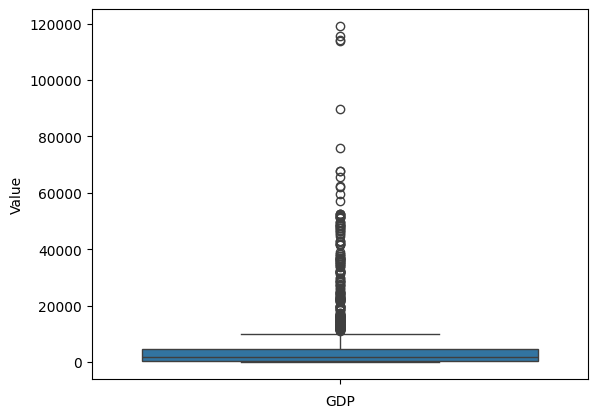

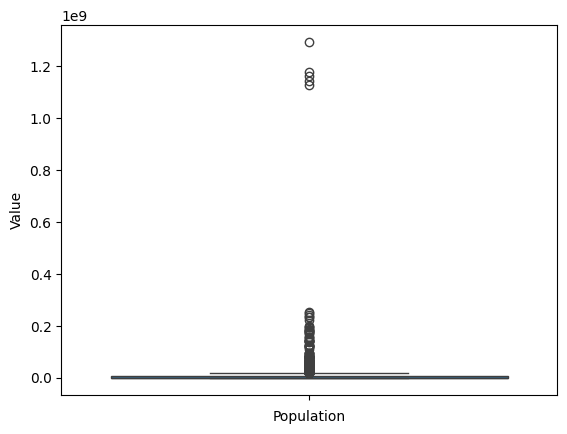

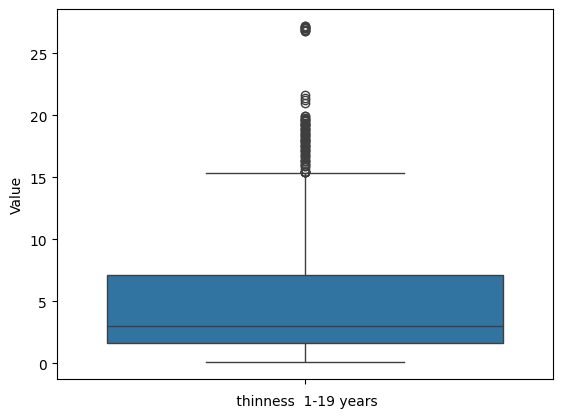

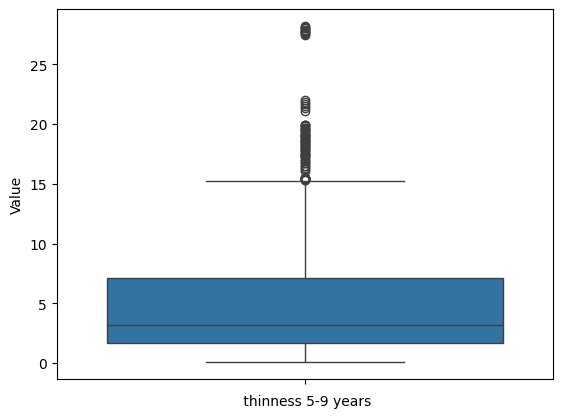

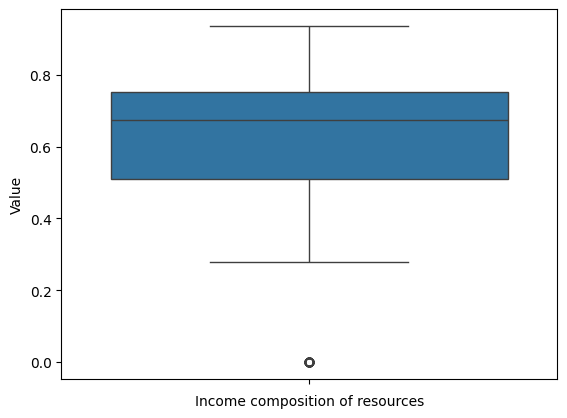

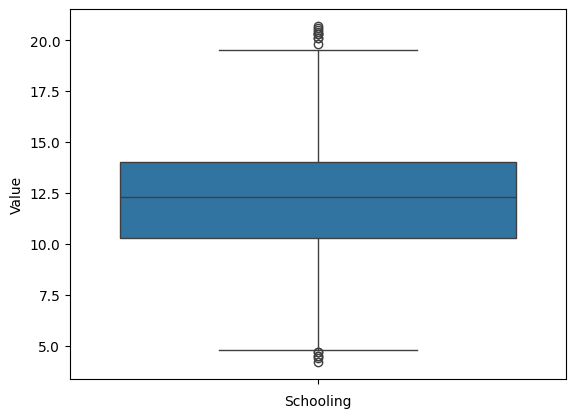

In [24]:
df1=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
for o in df1.columns:
  sns.boxplot(df1[o])
  plt.xlabel(o)
  plt.ylabel('Value')
  plt.show()

Outlier treatment using IQR method

In [25]:
for z in df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy']).columns:
  q1=np.percentile(df[z],25)
  q3=np.percentile(df[z],75)
  iqr=q3-q1
  lf=q1-(1.5*iqr)
  uf=q3+(1.5*iqr)
  df[z]=np.where(df[z]>uf,uf,np.where(df[z]<lf,lf,df[z]))

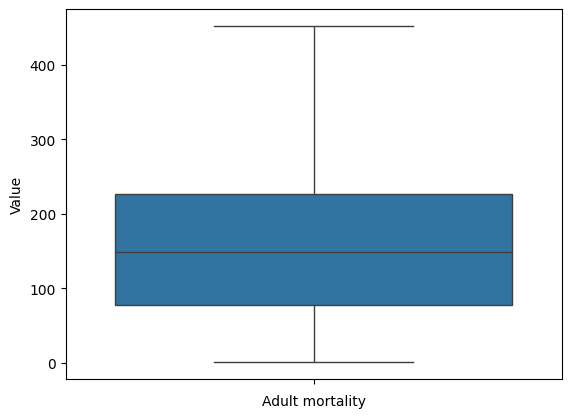

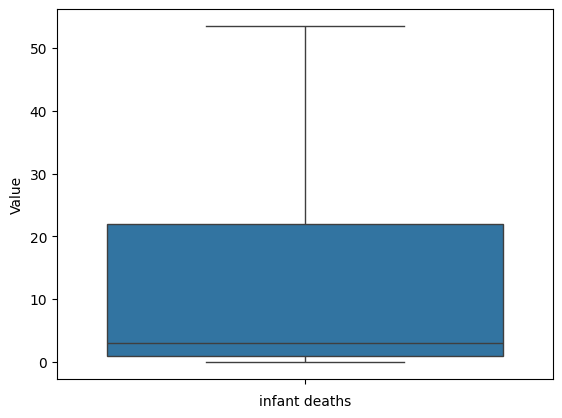

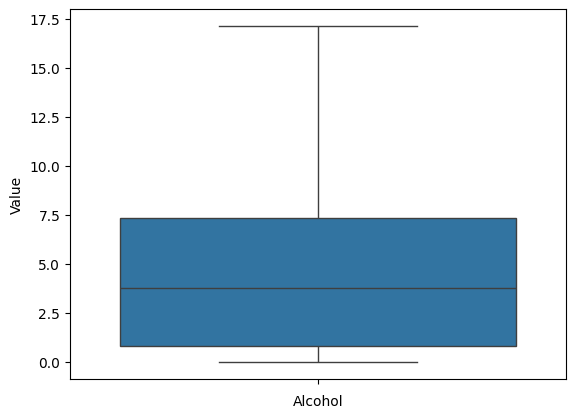

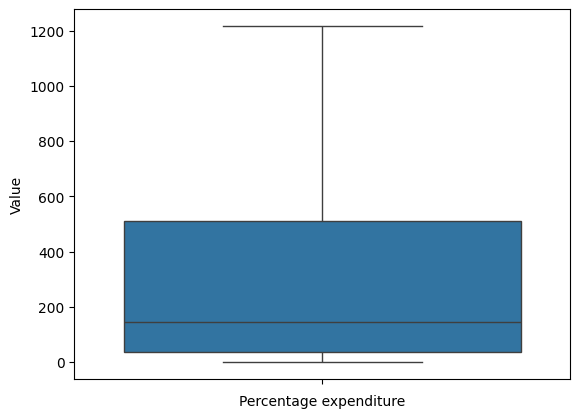

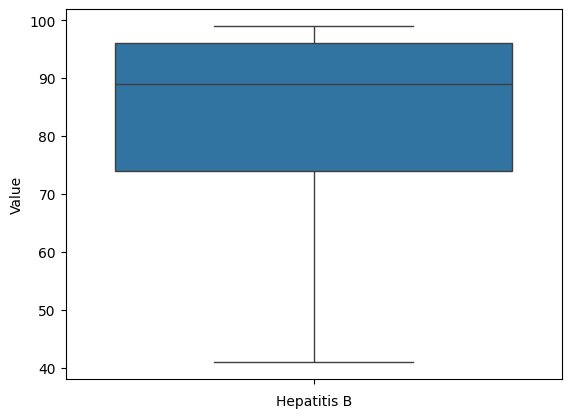

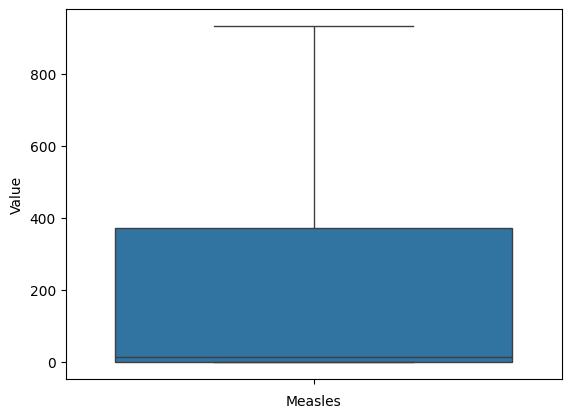

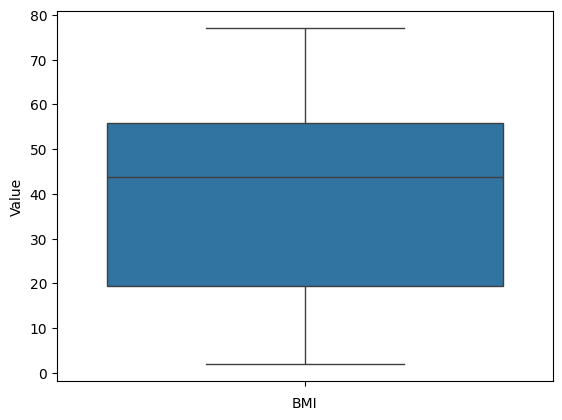

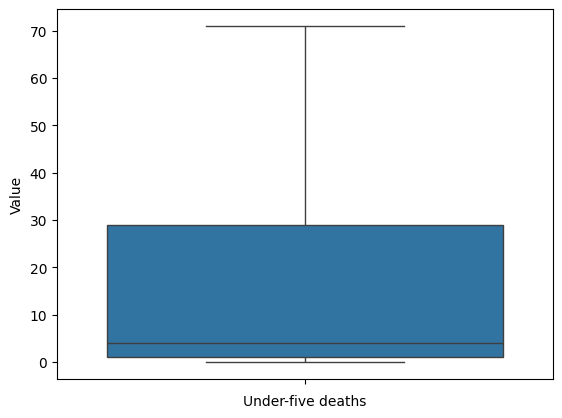

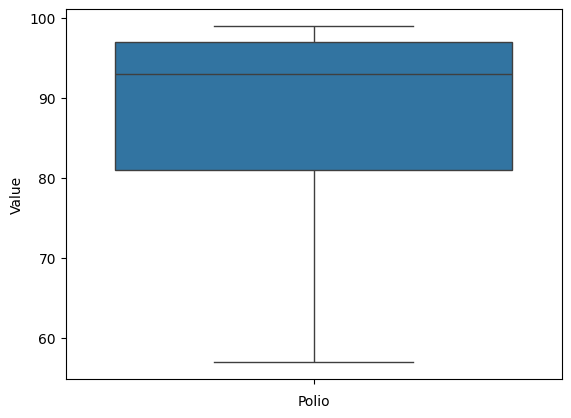

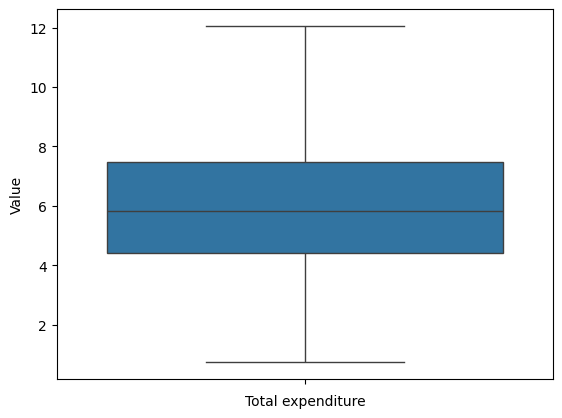

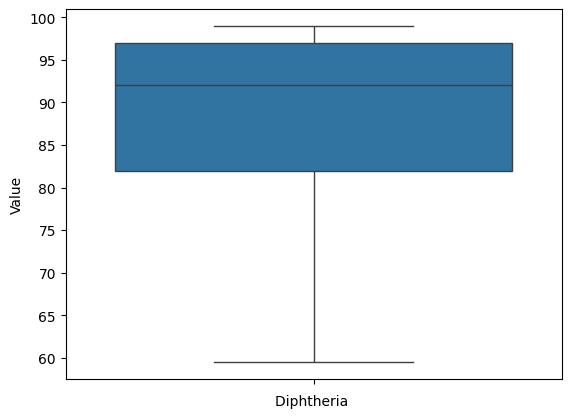

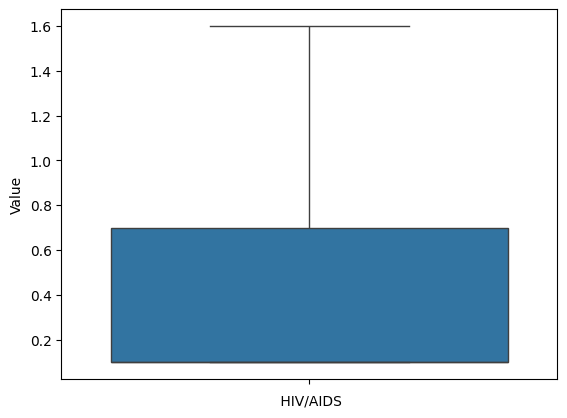

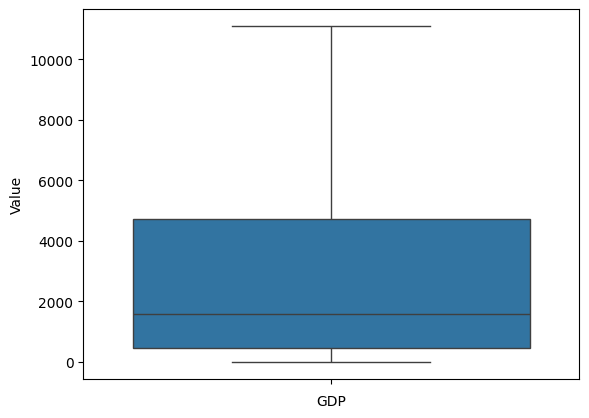

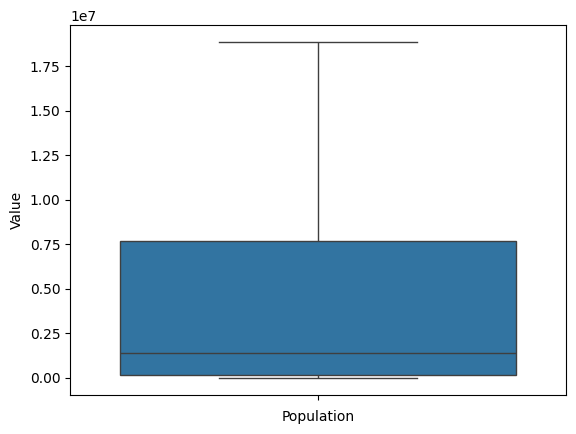

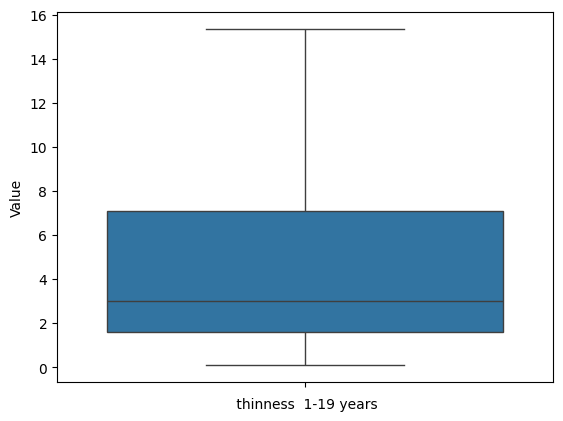

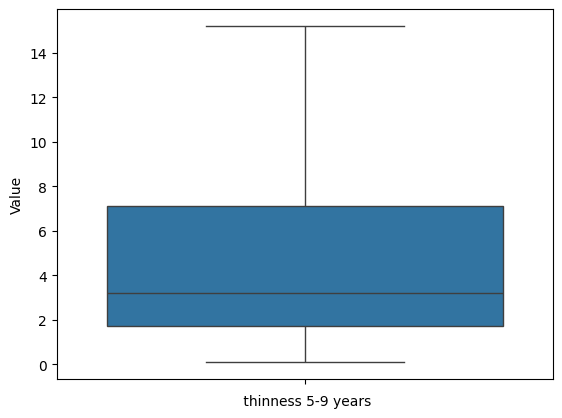

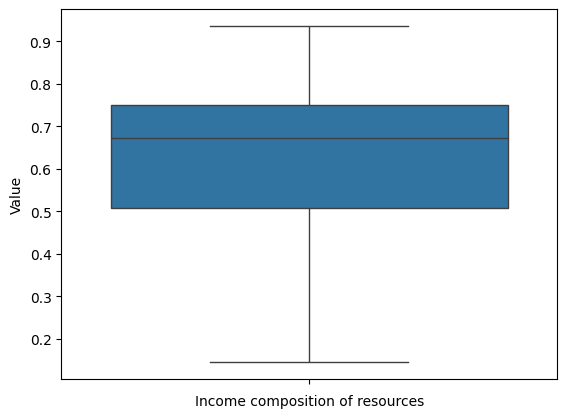

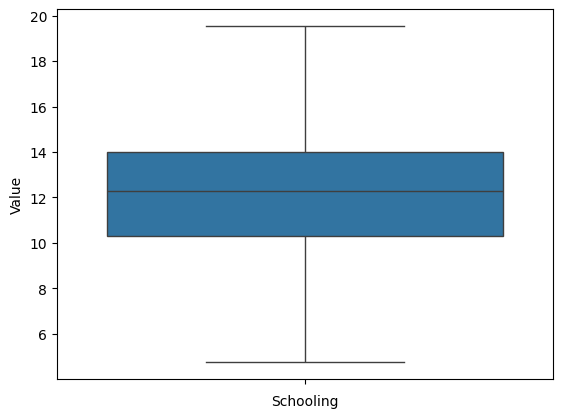

In [26]:
df1=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
for o in df1.columns:
  sns.boxplot(df1[o])
  plt.xlabel(o)
  plt.ylabel('Value')
  plt.show()

Chexking the distribution after the outlier treatment

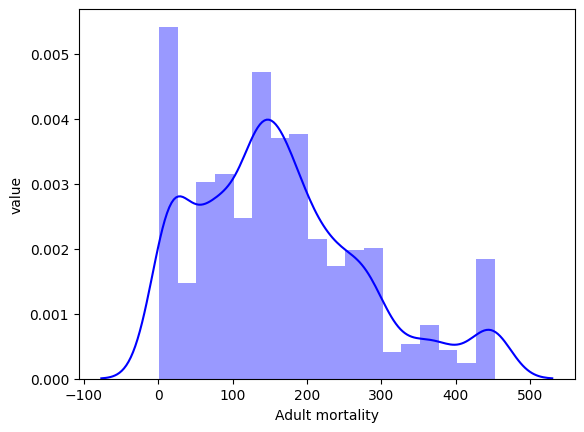

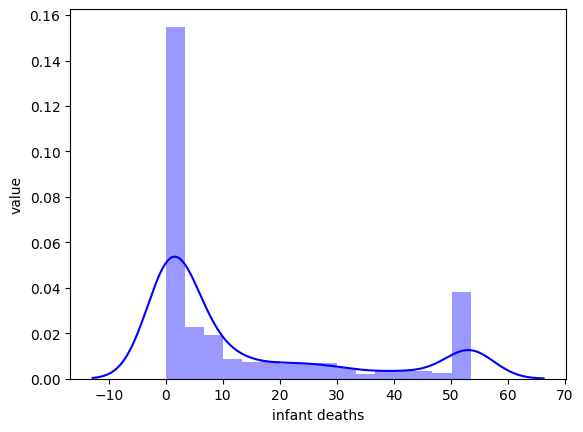

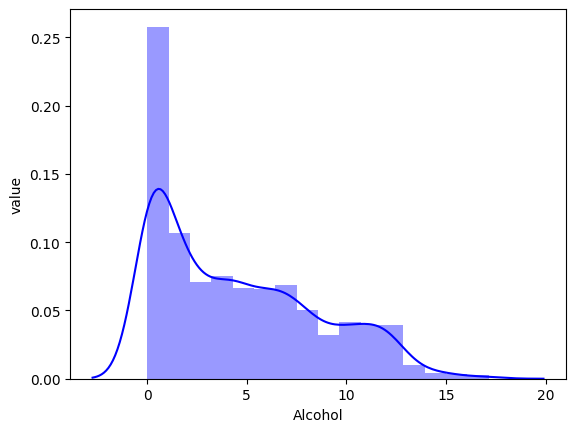

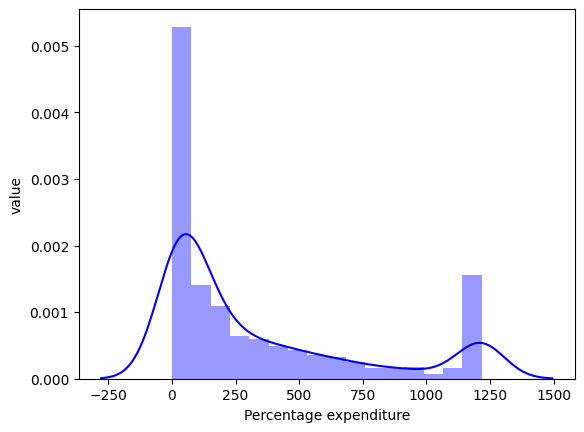

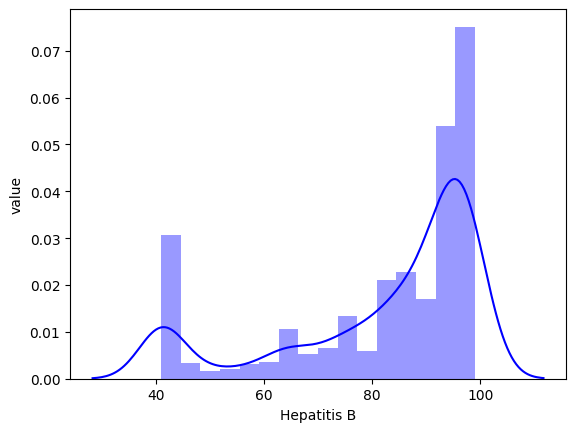

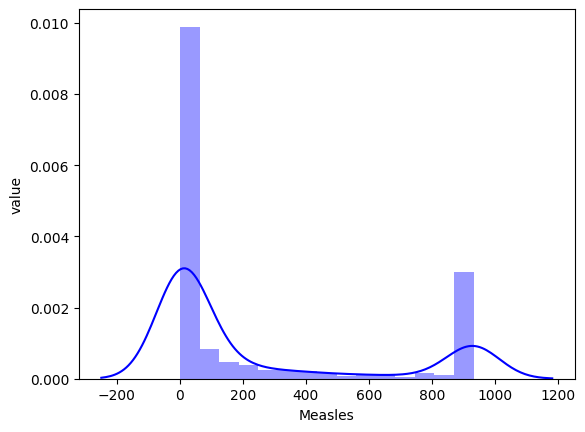

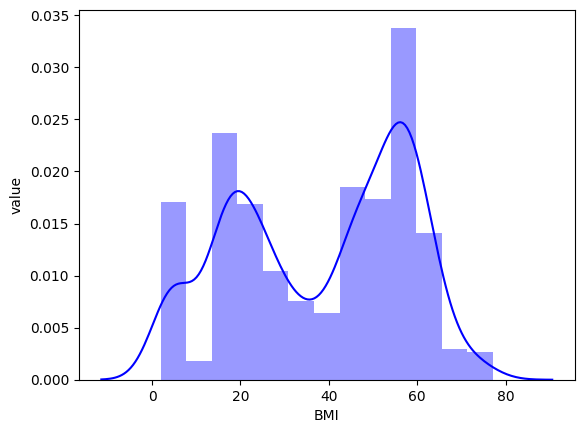

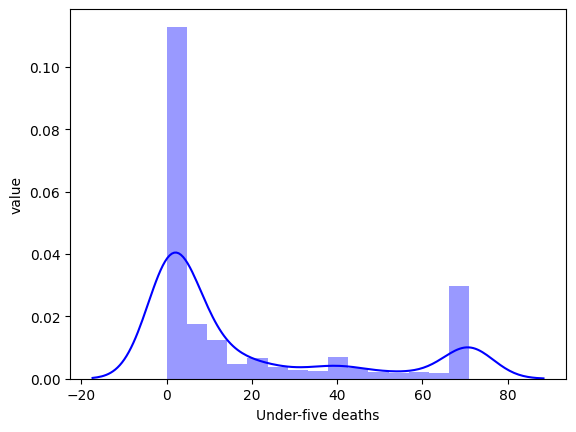

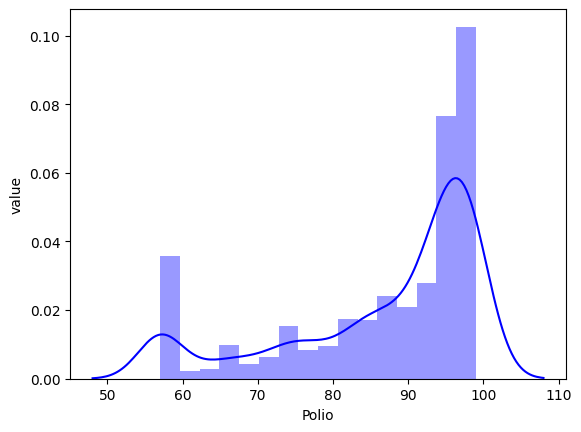

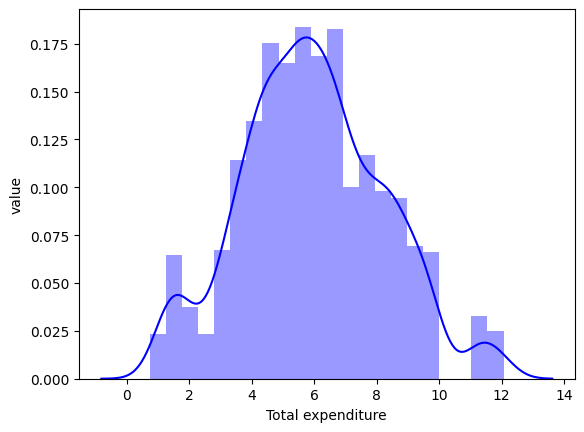

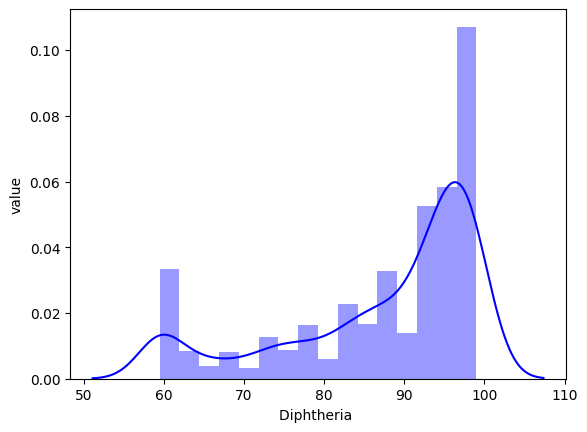

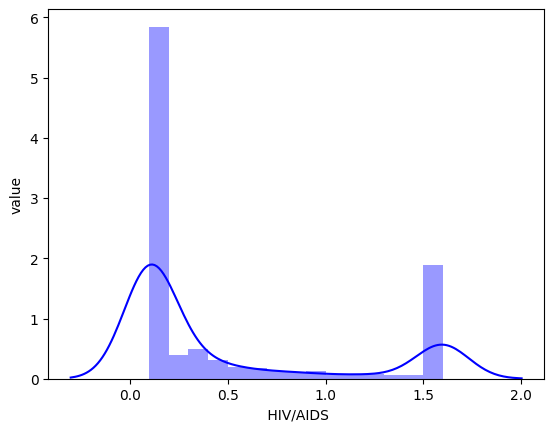

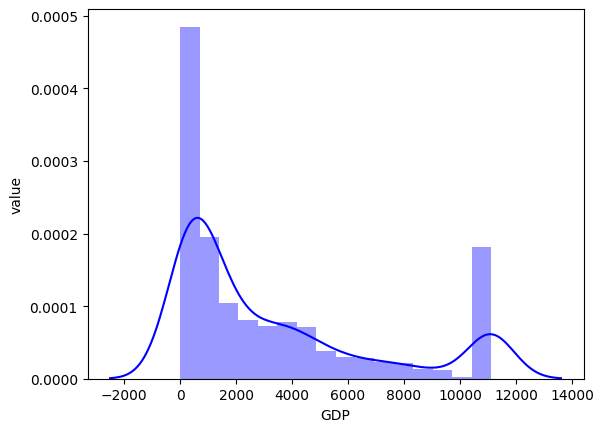

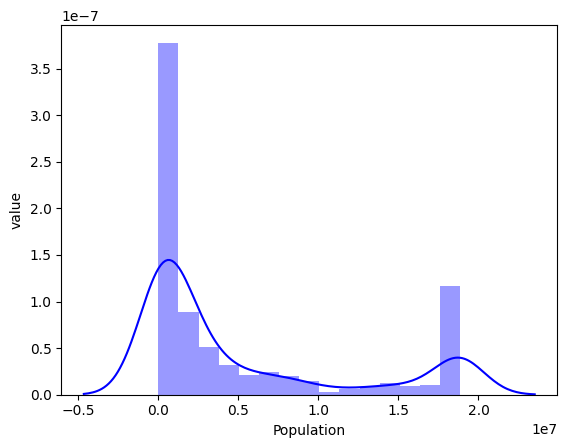

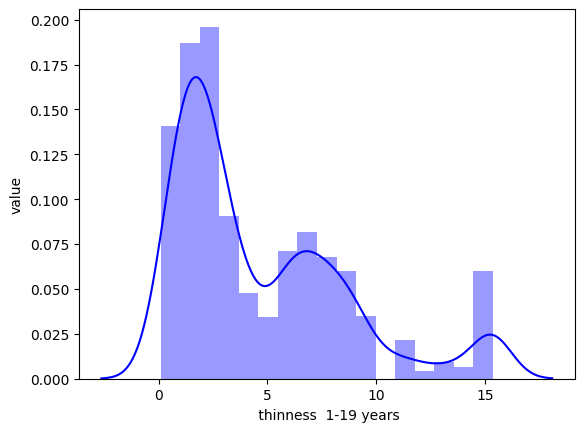

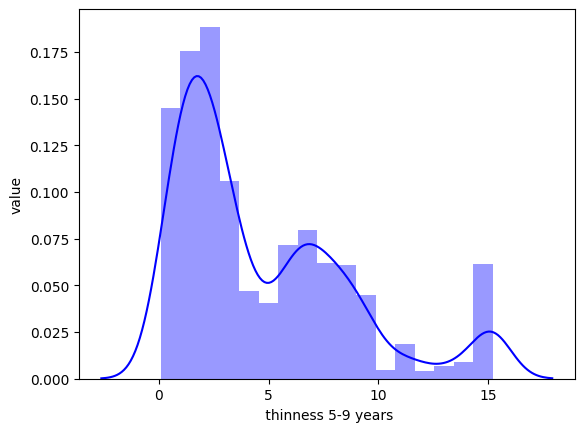

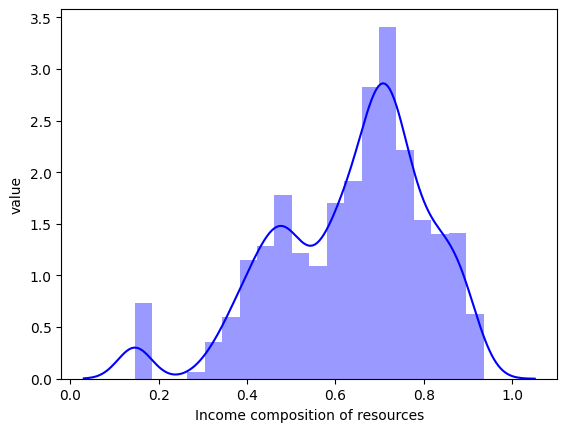

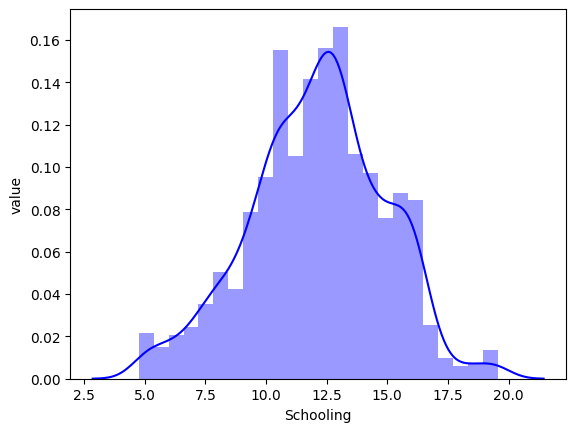

In [ ]:
df1=df.select_dtypes(include=['float64','int64']).drop(columns=['Year','Life expectancy'])
for i in df1.columns:
  sns.distplot(df1[i],color='blue')
  plt.xlabel(i)
  plt.ylabel('value')
  plt.show()

In [27]:
df=df.drop(columns=['Year','Country'])

Feature Engineering and Preprocessing

In [28]:
encoded_df=pd.get_dummies(df,columns=['Status'],drop_first=False)
# Find dummy columns created by get_dummies
dummy_cols = [col for col in encoded_df.columns if col.startswith('Status_')]

# Convert only those columns to int
encoded_df[dummy_cols] = encoded_df[dummy_cols].astype(int)
encoded_df

Life expectancy  Adult mortality  infant deaths  Alcohol  \
0                65.0            263.0           53.5     0.01   
1                59.9            271.0           53.5     0.01   
2                59.9            268.0           53.5     0.01   
3                59.5            272.0           53.5     0.01   
4                59.2            275.0           53.5     0.01   
...               ...              ...            ...      ...   
2933             44.3            452.0           27.0     4.36   
2934             44.5            452.0           26.0     4.06   
2935             44.8             73.0           25.0     4.43   
2936             45.3            452.0           25.0     1.72   
2937             46.0            452.0           24.0     1.68   

      Percentage expenditure  Hepatitis B  Measles   BMI  Under-five deaths  \
0                  71.279624         65.0    932.5  19.1               71.0   
1                  73.523582         62.0    492.0  18.6               71.0   
2                  73.219243         64.0    430.0  18.1               71.0   
3                  78.184215         67.0    932.5  17.6               71.0   
4                   7.097109         68.0    932.5  17.2               71.0   
...                      ...          ...      ...   ...                ...   
2933                0.000000         68.0     31.0  27.1               42.0   
2934                0.000000         41.0    932.5  26.7               41.0   
2935                0.000000         73.0    304.0  26.3               40.0   
2936                0.000000         76.0    529.0  25.9               39.0   
2937                0.000000         79.0    932.5  25.5               39.0   

      Polio  ...  Diphtheria    HIV/AIDS         GDP  Population  \
0      57.0  ...         65.0        0.1  584.259210  18859584.5   
1      58.0  ...         62.0        0.1  612.696514    327582.0   
2      62.0  ...         64.0        0.1  631.744976  18859584.5   
3      67.0  ...         67.0        0.1  669.959000   3696958.0   
4      68.0  ...         68.0        0.1   63.537231   2978599.0   
...     ...  ...          ...        ...         ...         ...   
2933   67.0  ...         65.0        1.6  454.366654  12777511.0   
2934   57.0  ...         68.0        1.6  453.351155  12633897.0   
2935   73.0  ...         71.0        1.6   57.348340    125525.0   
2936   76.0  ...         75.0        1.6  548.587312  12366165.0   
2937   78.0  ...         78.0        1.6  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                     15.35                 15.2   
1                     15.35                 15.2   
2                     15.35                 15.2   
3                     15.35                 15.2   
4                     15.35                 15.2   
...                     ...                  ...   
2933                   9.40                  9.4   
2934                   9.80                  9.9   
2935                   1.20                  1.3   
2936                   1.60                  1.7   
2937                  11.00                 11.2   

      Income composition of resources  Schooling  Status_Developed  \
0                               0.479       10.1                 0   
1                               0.476       10.0                 0   
2                               0.470        9.9                 0   
3                               0.463        9.8                 0   
4                               0.454        9.5                 0   
...                               ...        ...               ...   
2933                            0.407        9.2                 0   
2934                            0.418        9.5                 0   
2935                            0.427       10.0                 0   
2936                            0.427        9.8                 0   
2937                            0.434        9.8    

In [29]:
from sklearn.model_selection import cross_val_score, train_test_split

train_df, test_df = train_test_split(encoded_df,train_size=0.8, random_state=42)

In [30]:
# feature scaling of numerical columns
from sklearn.preprocessing import StandardScaler
import joblib
numerical_cols = encoded_df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols.remove("Life expectancy")
#scaled_df = encoded_df.copy()
scaler=StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])
#saving the scaler file
joblib.dump(scaler, "scaler.pkl")

train_df

Life expectancy  Adult mortality  infant deaths   Alcohol  \
1014             61.2         0.851507       1.375733 -0.709405   
93               74.1        -0.233256      -0.105480  0.813648   
2015             74.0        -0.276647      -0.158381 -0.055257   
2929             48.2         2.491670       0.846728 -0.235456   
2583             71.2         0.252718       0.159022  0.347105   
...               ...              ...            ...       ...   
1951             64.2         0.122546       2.089889 -1.106830   
2223             65.8        -1.248595      -0.740286 -0.094753   
1528             72.2         0.235362      -0.740286  1.946680   
2576             73.5        -0.024982      -0.158381  0.347105   
1947             65.1         0.061799       2.089889 -1.104361   

      Percentage expenditure  Hepatitis B   Measles       BMI  \
1014               -0.278647     0.504294 -0.344564 -0.596853   
93                  0.322317    -0.836438 -0.669759  0.864909   
2015                0.435699     0.611553 -0.669759 -1.650330   
2929               -0.780042    -0.353774 -0.669759 -0.470839   
2583               -0.399249     0.718811  1.857271 -0.934571   
...                      ...          ...       ...       ...   
1951               -0.732143    -0.192886  1.857271 -0.929530   
2223               -0.803857     0.879699 -0.669759 -0.591813   
1528                2.155227     0.718811 -0.669759  1.096774   
2576                0.665196     0.879699  1.857271 -0.617016   
1947               -0.829539     0.021631  1.857271 -0.808557   

      Under-five deaths     Polio  ...  Diphtheria    HIV/AIDS       GDP  \
1014           1.531474  0.349342  ...     0.322083   1.358600 -0.461898   
93            -0.223398  0.574626  ...     0.485212  -0.662255 -0.188543   
2015          -0.145404  0.499531  ...     0.485212  -0.325446  0.092381   
2929           1.063508 -0.852175  ...    -0.982946   1.863814 -0.801968   
2583           0.049582  0.799910  ...     0.729905   0.516577 -0.375291   
...                 ...       ...  ...          ...        ...       ...   
1951           2.038437 -0.701985  ...    -0.738253  -0.662255 -0.652772   
2223          -0.730362  0.950100  ...     0.893033   0.684982 -0.836295   
1528          -0.730362  0.875005  ...     0.893033  -0.662255  2.131719   
2576          -0.223398  0.950100  ...     0.974598  -0.325446  0.301293   
1947           2.038437 -0.326511  ...    -0.411996  -0.662255 -0.886770   

      Population   thinness  1-19 years   thinness 5-9 years  \
1014    1.984571               0.549495             0.516447   
93     -0.210414              -0.868235            -0.931361   
2015    1.984571              -0.868235            -0.881436   
2929    1.212483               0.773347             0.766069   
2583    1.984571               1.146434             1.215388   
...          ...                    ...                  ...   
1951    1.538079               2.651217             2.613272   
2223   -0.759664               0.400260             0.366674   
1528   -0.301592              -0.470276            -0.457079   
2576    0.206956               0.947454             0.965766   
1947   -0.506477              -0.619511            -0.507003   

      Income composition of resources  Schooling  Status_Developed  \
1014                        -0.453108  -0.428930         -0.410232   
93                           0.833805   1.504003         -0.410232   
2015                         0.370052   0.394356         -0.410232   
2929                        -1.224096  -0.858471         -0.410232   
2583                         0.097598  -0.321545         -0.410232   
...                               ...        ...               ...   
1951                        -0.760343  -2.003913         -0.410232   
2223                        -0.574843  -0.715291         -0.410232   
1528                         1.117853   1.611389          2.437643   
2576                         0.393240 

In [31]:
test_df

Life expectancy  Adult mortality  infant deaths   Alcohol  \
1210             67.5        -1.265951       2.089889 -1.099424   
2273             73.8        -0.285325      -0.687385  1.181451   
1005             79.1        -0.684518      -0.581584  1.805977   
2926             54.9         2.491670       0.740927  0.366853   
518              48.6         2.491670       0.159022 -0.729152   
...               ...              ...            ...       ...   
1453             71.0        -1.205205      -0.740286  1.060496   
2821             75.4        -0.372106      -0.687385  0.282925   
483              55.9         1.771387       1.904737 -1.111767   
290              69.1         0.469671      -0.740286 -1.111767   
486              54.8         1.806100       2.089889  0.339700   

      Percentage expenditure  Hepatitis B   Measles       BMI  \
1210               -0.579390    -0.300145  1.857271 -1.786425   
2273                1.064880     0.933328 -0.125058  0.864909   
1005                2.155227     0.343406 -0.341854  0.965720   
2926               -0.674780     0.665182 -0.669759 -0.405312   
518                -0.731938    -2.123540 -0.639949 -0.914409   
...                      ...          ...       ...       ...   
1453               -0.634835     0.879699 -0.669759  0.940517   
2821                1.333479     0.665182 -0.669759  0.995963   
483                -0.662985     0.182518  0.980602 -0.541407   
290                -0.782625     0.826070 -0.669759 -0.768232   
486                -0.808993    -2.177169  0.010439 -0.632137   

      Under-five deaths     Polio  ...  Diphtheria    HIV/AIDS       GDP  \
1210           2.038437 -0.701985  ...    -1.146074  -0.493851 -0.385419   
2273          -0.691364  0.499531  ...     0.566776  -0.662255  0.595124   
1005          -0.613370  0.724816  ...     0.729905  -0.662255  2.131719   
2926           0.907519  0.499531  ...     0.485212   1.863814 -0.661985   
518            0.244567 -2.203881  ...    -2.247192   1.863814 -0.768137   
...                 ...       ...  ...          ...        ...       ...   
1453          -0.730362  0.950100  ...     0.974598  -0.662255  0.838393   
2821          -0.691364  0.649721  ...     0.566776  -0.662255  0.230165   
483            2.038437 -0.101227  ...    -0.167303   1.863814 -0.548823   
290           -0.691364  0.799910  ...     0.811469   0.179768 -0.826411   
486            2.038437 -0.551796  ...    -2.247192   1.863814 -0.857085   

      Population   thinness  1-19 years   thinness 5-9 years  \
1210    1.984571              -0.719001            -0.756625   
2273    0.312841              -0.569766            -0.581890   
1005    0.439560              -0.893108            -0.906398   
2926    1.333104               0.524622             0.491485   
518    -0.755789               1.096689             1.090577   
...          ...                    ...                  ...   
1453   -0.432643              -0.544893            -0.531965   
2821   -0.713832              -0.743873            -0.781587   
483    -0.444403               0.300770             0.291787   
290    -0.650845               2.651217             2.613272   
486     1.984571               0.400260             0.391636   

      Income composition of resources  Schooling  Status_Developed  \
1210                         0.033832  -0.393135         -0.410232   
2273                         0.642507   0.501742         -0.410232   
1005                         1.419292   1.539798          2.437643   
2926                        -1.044392  -0.715291         -0.410232   
518                         -1.664660  -2.039708         -0.410232   
...                               ...        ...               ...   
1453                         0.833805   1.217643          2.437643   
2821                         0.683085   1.217643         -0.410232   
483                         -0.789328  -0.607906         -0.410232   
290                         -0.250216 

In [32]:
x_train = train_df.drop(['Life expectancy'], axis=1)
y_train = train_df['Life expectancy']
x_test = test_df.drop(['Life expectancy'],axis=1)
y_test = test_df['Life expectancy']

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1319, 20), (330, 20), (1319,), (330,))

# Machine learning model to compared the results with deep learning. Here I am taking Random forrest for comparison with deep learning

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define models
models = {
    'Linear': LinearRegression(),
    'L1 (Lasso)': Lasso(alpha=0.1),
    'L2 (Ridge)': Ridge(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Support Vector (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluation function
def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    return {
        'Model': name,
        'R² Train(%)': r2_score(y_train, y_pred_train) * 100,
        'R² Test(%)': r2_score(y_test, y_pred_test) * 100,
        'MAE Train': mean_absolute_error(y_train, y_pred_train),
        'MAE Test': mean_absolute_error(y_test, y_pred_test),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test))
    }

# Evaluate all models and store results
results = [evaluate_model(name, model, x_train, y_train, x_test, y_test)
           for name, model in models.items()]

# Create results DataFrame
results_df = pd.DataFrame(results).round(2)


In [35]:
print(results_df.to_string(index=False))

               Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test  RMSE Train  RMSE Test
              Linear        83.46       83.55       2.63      2.50        3.61       3.42
          L1 (Lasso)        82.95       83.54       2.64      2.49        3.67       3.42
          L2 (Ridge)        83.46       83.55       2.63      2.50        3.61       3.42
          ElasticNet        83.02       83.23       2.64      2.51        3.66       3.45
Support Vector (SVR)        86.39       85.36       2.16      2.22        3.28       3.22
       Decision Tree       100.00       85.58       0.00      1.83        0.00       3.20
       Random Forest        99.33       94.31       0.46      1.17        0.73       2.01
   Gradient Boosting        96.59       92.32       1.18      1.60        1.64       2.34


Selecting only Random Forrest for comparison with deep learning model. Using random forrest to tune the parameters for further improve the accuracy.

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint, uniform

In [38]:
rf = RandomForestRegressor(random_state=42)

rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    rf,
    param_distributions=rf_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

rf_random.fit(x_train, y_train)
print("Random Forest Best Params:", rf_random.best_params_)
# Train RMSE
rmse_train = mean_squared_error(y_train, rf_random.predict(x_train)) ** 0.5
print("Random Forest Hypertuning Train RMSE:", round(rmse_train, 3))

# Test RMSE
rmse_test = mean_squared_error(y_test, rf_random.predict(x_test)) ** 0.5
print("Random Forest Hypertuning Test RMSE:", round(rmse_test, 3))

# Train R2
r2_score_train = r2_score(y_train, rf_random.predict(x_train))
print("Random Forest Hypertuning Train R2 score:", round(r2_score_train, 3))

# Test R2
r2_score_test = r2_score(y_test, rf_random.predict(x_test))
print("Random Forest Hypertuning Test R2 score:", round(r2_score_test, 3))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest Best Params: {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 223}
Random Forest Hypertuning Train RMSE: 0.787
Random Forest Hypertuning Test RMSE: 2.003
Random Forest Hypertuning Train R2 score: 0.992
Random Forest Hypertuning Test R2 score: 0.943


Random forrest final parameters

In [50]:
# Building the models

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


def evaluate_model(name, model, x_train, y_train, x_test, y_test):
    #model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    return {
        'Model': name,
        'R² Train(%)': r2_score(y_train, y_pred_train) * 100,
        'R² Test(%)': r2_score(y_test, y_pred_test) * 100,
        'MAE Train': mean_absolute_error(y_train, y_pred_train),
        'MAE Test': mean_absolute_error(y_test, y_pred_test)
    }

models = [
    ('Random Forest', rf_random),
    # Add more here
]

results = [evaluate_model(name, model, x_train, y_train, x_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(2)
print(results_df)


           Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test
0  Random Forest        99.21       94.35       0.53      1.23


Deep learning models

In [40]:
import tensorflow
from keras.layers import Dense

In [41]:
x_train.columns

Index(['Adult mortality', 'infant deaths', 'Alcohol', 'Percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'Under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developed',
       'Status_Developing'],
      dtype='object')

Basic ANN architecture with 2 hidden layers

In [42]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
model_ann=keras.Sequential()
model_ann.add(Dense(64,input_dim=20,activation='relu',))
model_ann.add(Dense(32,activation='relu'))
model_ann.add(Dense(1,activation='linear'))

In [43]:
model_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_ann.compile(loss='mean_absolute_error',optimizer='adam') # mostly adam is used.

In [46]:
history1 = model_ann.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 67.8270 - val_loss: 64.1241
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.7103 - val_loss: 46.8663
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.4028 - val_loss: 21.7580
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.9859 - val_loss: 13.9017
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.2450 - val_loss: 11.2568
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0507 - val_loss: 9.5173
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9957 - val_loss: 8.4463
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6879 - val_loss: 7.5954
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1600 - val_loss: 6.9311
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0979 - val_loss: 6.4692
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7987 - val_loss: 6.0298
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [51]:

models = [
    ('Random Forest', rf_random),
    ('Basic_ANN', model_ann)
]

results = [evaluate_model(name, model, x_train, y_train, x_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(2)
results_df['Hideen Layers'] = ["N/A",[64,32]]
print(results_df)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
           Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test Hideen Layers
0  Random Forest        99.21       94.35       0.53      1.23           N/A
1      Basic_ANN        90.99       87.15       1.76      2.09      [64, 32]


ANN architecture with kernel regularizer and Batch Normalization


kernel_regularizer=l2(0.001) helps reduce overfitting by penalizing large weights.

BatchNormalization() normalizes the output of each hidden layer to improve convergence

In [53]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
model_ann_l2=keras.Sequential()
model_ann_l2.add(Dense(256,input_dim=20,activation='relu',kernel_regularizer=l2(0.001)))
model_ann_l2.add(BatchNormalization())
model_ann_l2.add(Dense(128,activation='relu'))
model_ann_l2.add(BatchNormalization())
model_ann_l2.add(Dense(32,activation='relu'))
model_ann_l2.add(Dense(1,activation='linear'))

In [54]:
model_ann_l2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,969 (171.75 KB)

 Trainable params: 43,201 (168.75 KB)

 Non-trainable params: 768 (3.00 KB)

In [55]:
model_ann_l2.compile(loss='mean_absolute_error',optimizer='adam') # mostly adam is used.

In [56]:
history2 = model_ann_l2.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - loss: 68.2907 - val_loss: 66.6139
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 58.3873 - val_loss: 56.6553
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 39.0023 - val_loss: 34.5161
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.4582 - val_loss: 27.6078
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11.5036 - val_loss: 22.0364
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.9046 - val_loss: 13.0978
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1058 - val_loss: 10.7192
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4650 - val_loss: 11.1331
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8815 - val_loss: 6.4528
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.3932 - val_loss: 7.0444
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3588 - val_loss: 6.3614
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [61]:
models = [
    ('Random Forest', rf_random),
    ('Basic_ANN', model_ann),
    ('ANN_L2_regularization',model_ann_l2)
]

results = [evaluate_model(name, model, x_train, y_train, x_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(2)
results_df['Hideen Layers'] = ["N/A",[64,32],[256,128,32]]
print(results_df.to_string(index=False))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
                Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test  Hideen Layers
        Random Forest        99.21       94.35       0.53      1.23            N/A
            Basic_ANN        90.99       87.15       1.76      2.09       [64, 32]
ANN_L2_regularization        95.58       91.10       1.34      1.77 [256, 128, 32]


ANN Model with l2 regularization, batch normalization and Dropout regualrization

In [62]:
from tensorflow.keras.layers import Dense, Dropout
model_ann_l2_dropout=keras.Sequential()
model_ann_l2_dropout.add(Dense(256,input_dim=20,activation='relu',kernel_regularizer=l2(0.001)))
model_ann_l2_dropout.add(Dropout(0.1))
model_ann_l2_dropout.add(BatchNormalization())
model_ann_l2_dropout.add(Dense(128,activation='relu'))
model_ann_l2_dropout.add(Dropout(0.1))
model_ann_l2_dropout.add(BatchNormalization())
model_ann_l2_dropout.add(Dense(32,activation='relu'))
model_ann_l2_dropout.add(Dense(1,activation='linear'))

model_ann_l2_dropout.compile(loss='mean_absolute_error',optimizer='adam') # mostly adam is used.
history3 = model_ann_l2_dropout.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 66.0906 - val_loss: 64.0629
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 52.8496 - val_loss: 49.6746
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.7805 - val_loss: 26.4634
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.2687 - val_loss: 25.1121
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.1256 - val_loss: 18.6889
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9577 - val_loss: 12.4992
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2329 - val_loss: 7.6882
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8497 - val_loss: 4.9849
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9016 - val_loss: 4.2407
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.9327 - val_loss: 3.8399
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8089 - val_loss: 3.2568
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

In [65]:
models = [
    ('Random Forest', rf_random),
    ('Basic_ANN', model_ann),
    ('ANN_L2_regularization',model_ann_l2),
     ('ANN_L2_dropout_regularization',model_ann_l2_dropout)
]

results = [evaluate_model(name, model, x_train, y_train, x_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(2)
results_df['Hideen Layers'] = ["N/A",[64,32],[256,128,32],[256,128,32]]
print(results_df.to_string(index=False))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
                        Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test  Hideen Layers
                Random Forest        99.21       94.35       0.53      1.23            N/A
                    Basic_ANN        90.99       87.15       1.76      2.09       [64, 32]
        ANN_L2_regularization        95.58       91.10       1.34      1.77 [256, 128, 32]
ANN_L2_dropout_regularization        95.35       92.03       1.30      1.58 [256, 128, 32]


Early stopping

In [66]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
model_early=keras.Sequential()
model_early.add(Dense(256,input_dim=20,activation='relu',kernel_regularizer=l2(0.001)))
model_early.add(BatchNormalization())
model_early.add(Dense(128,activation='relu'))
model_early.add(BatchNormalization())
model_early.add(Dense(32,activation='relu'))
model_early.add(Dense(1,activation='linear'))

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

# Compile and train the model
model_early.compile(loss='mean_absolute_error',optimizer='adam') # mostly adam is used.
history4 = model_early.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, callbacks=callback)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - loss: 2.5221 - val_loss: 2.1456
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3113 - val_loss: 2.6914
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1811 - val_loss: 2.2372
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1189 - val_loss: 2.0883
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4954 - val_loss: 2.0070
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3029 - val_loss: 1.8628
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0201 - val_loss: 1.8996
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0270 - val_loss: 2.2741
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3896 - val_loss: 2.0201
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0401 - val_loss: 2.4022
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2884 - val_loss: 2.0729
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - l

In [69]:
models = [
    ('Random Forest', rf_random),
    ('Basic_ANN', model_ann),
    ('ANN_L2_regularization',model_ann_l2),
     ('ANN_L2_dropout_regularization',model_ann_l2_dropout),
      ('ANN_L2_early_stopping',model_early)
]

results = [evaluate_model(name, model, x_train, y_train, x_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(2)
results_df['Hideen Layers'] = ["N/A",[64,32],[256,128,32],[256,128,32],[256,128,32]]
print(results_df.to_string(index=False))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
                        Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test  Hideen Layers
                Random Forest        99.21       94.35       0.53      1.23            N/A
                    Basic_ANN        90.99       87.15       1.76      2.09       [64, 32]
        ANN_L2_regularization        95.58       91.10       1.34      1.77 [256, 128, 32]
ANN_L2_dropout_regularization        95.35       92.03       1.30      1.58 [256, 128, 32]
        ANN_L2_early_stopping        96.14       91.66       1.18      1.65 [256, 128, 32]


Early Stopping and modelCheckpoint

In [70]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
model_early_checkpoint=keras.Sequential()
model_early_checkpoint.add(Dense(256,input_dim=20,activation='relu',kernel_regularizer=l2(0.001)))
model_early_checkpoint.add(BatchNormalization())
model_early_checkpoint.add(Dense(128,activation='relu'))
model_early_checkpoint.add(BatchNormalization())
model_early_checkpoint.add(Dense(32,activation='relu'))
model_early_checkpoint.add(Dense(1,activation='linear'))


In [72]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
# Early stopping to prevent overfitting
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

# Save best model during training
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)
# Compile and train the model
model_early_checkpoint.compile(loss='mean_absolute_error',optimizer='adam') # mostly adam is used.
history5 = model_early_checkpoint.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=100, callbacks=[checkpoint,callback])

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 68.0237
Epoch 1: val_loss improved from inf to 67.24840, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 67.9861 - val_loss: 67.2484
Epoch 2/100
23/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.1955 
Epoch 2: val_loss improved from 67.24840 to 56.43442, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 59.4093 - val_loss: 56.4344
Epoch 3/100
24/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.8483 
Epoch 3: val_loss improved from 56.43442 to 32.14133, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.4263 - val_loss: 32.1413
Epoch 4/100
39/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6347
Epoch 4: val_loss improved from 32.14133 to 23.08842, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6237 - val_loss: 23.0884
Epoch 5/100
23/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9983
Epoch 5: val_loss 

In [73]:
models = [
    ('Random Forest', rf_random),
    ('Basic_ANN', model_ann),
    ('ANN_L2_regularization',model_ann_l2),
     ('ANN_L2_dropout_regularization',model_ann_l2_dropout),
      ('ANN_L2_early_stopping',model_early),
    ('ANN_L2_early_stopping-checkpoint',model_early_checkpoint)
]

results = [evaluate_model(name, model, x_train, y_train, x_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(2)
results_df['Hideen Layers'] = ["N/A",[64,32],[256,128,32],[256,128,32],[256,128,32],[256,128,32]]
print(results_df.to_string(index=False))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
                           Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test  Hideen Layers
                   Random Forest        99.21       94.35       0.53      1.23            N/A
                       Basic_ANN        90.99       87.15       1.76      2.09       [64, 32]
           ANN_L2_regularization        95.58       91.10       1.34      1.77 [256, 128, 32]
   ANN_L2_dropout_regularization        95.35       92.03       1.30      1.58 [256, 128, 32]
           ANN_L2_early_stopping        96.14       91.66       1.18      1.65 [256, 128, 32]
ANN_L2_early_stopping-checkpoint        

KerasTuner to tune to best parameters (No. of hidden layers, optimizers, loss function, activation functions etc.)

In [75]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [76]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model = Sequential()

    # Tune number of hidden layers: 1 to 3
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune number of units in each layer: 8 to 64 with step 8
        units = hp.Int(f'units_{i}', min_value=8, max_value=64, step=8)

        # Tune activation function
        activation = hp.Choice(f'act_{i}', ['relu', 'tanh', 'elu'])

        if i == 0:
            # First layer with input shape
            model.add(Dense(units=units, activation=activation, input_dim=x_train.shape[1]))
        else:
            model.add(Dense(units=units, activation=activation))

    # Output layer for regression (linear activation)
    model.add(Dense(1, activation='linear'))

    # Tune optimizer
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    if optimizer_choice == 'adam':
        optimizer = Adam(
            hp.Float('adam_lr', 1e-4, 1e-2, sampling='log'))
    else:
        optimizer = RMSprop(
            hp.Float('rmsprop_lr', 1e-4, 1e-2, sampling='log'))

    # Tune loss function choice (mean_absolute_error or mean_squared_error)
    loss_choice = hp.Choice('loss', ['mean_absolute_error', 'mean_squared_error'])

    model.compile(optimizer=optimizer, loss=loss_choice, metrics=['mae'])

    return model


In [77]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',      # Minimize validation loss
    max_trials=20,             # Number of hyperparameter sets to try
    executions_per_trial=2,    # Average results over 2 runs for stability
    directory='keras_tuner_dir',
    project_name='regression_tuning'
)

In [78]:
tuner.search(x_train, y_train,
             epochs=50,
             validation_data=(x_test, y_test),
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Trial 20 Complete [00h 00m 39s]
val_loss: 10.825013637542725

Best val_loss So Far: 1.947474181652069
Total elapsed time: 00h 11m 02s


In [80]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(f"Number of layers: {best_hp.get('num_layers')}")
for i in range(best_hp.get('num_layers')):
    print(f"Units in layer {i}: {best_hp.get(f'units_{i}')}")
    print(f"Activation in layer {i}: {best_hp.get(f'act_{i}')}")
print(f"Optimizer: {best_hp.get('optimizer')}")
print(f"Loss function: {best_hp.get('loss')}")

best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Best hyperparameters:
Number of layers: 3
Units in layer 0: 8
Activation in layer 0: tanh
Units in layer 1: 40
Activation in layer 1: tanh
Units in layer 2: 32
Activation in layer 2: elu
Optimizer: adam
Loss function: mean_absolute_error


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,873 (7.32 KB)

 Trainable params: 1,873 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
print(best_hp.values)

{'num_layers': 3, 'units_0': 8, 'act_0': 'tanh', 'optimizer': 'adam', 'adam_lr': 0.003225943238477045, 'loss': 'mean_absolute_error', 'units_1': 40, 'act_1': 'tanh', 'units_2': 32, 'act_2': 'elu', 'rmsprop_lr': 0.00013097028262026609}


Checking loss with the best parameters

In [83]:
# 1. Get the best hyperparameters from tuning
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# 2. Build the model using the best hyperparameters
model_keras_tuner = tuner.hypermodel.build(best_hp)

# 3. Train the model and store the history
history6 = model_keras_tuner.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)



Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 68.0608 - mae: 68.0608 - val_loss: 61.4758 - val_mae: 61.4758
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.6528 - mae: 52.6528 - val_loss: 12.2396 - val_mae: 12.2396
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7185 - mae: 8.7185 - val_loss: 4.4533 - val_mae: 4.4533
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2924 - mae: 4.2924 - val_loss: 3.8824 - val_mae: 3.8824
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6680 - mae: 3.6680 - val_loss: 3.4014 - val_mae: 3.4014
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.2360 - mae: 3.2360 - val_loss: 3.1175 - val_mae: 3.1175
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1659 - mae: 3.1659 - val_loss: 3.0473 - val_mae: 3.0473
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0269 - mae: 3.0269 - val_loss: 2.9188 - val_mae: 2.9188
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - lo

In [84]:
models = [
    ('Random Forest', rf_random),
    ('Basic_ANN', model_ann),
    ('ANN_L2_regularization',model_ann_l2),
     ('ANN_L2_dropout_regularization',model_ann_l2_dropout),
      ('ANN_L2_early_stopping',model_early),
    ('ANN_L2_early_stopping-checkpoint',model_early_checkpoint),
    ('ANN_keras_tuner_early_stopping',model_keras_tuner)
]

results = [evaluate_model(name, model, x_train, y_train, x_test, y_test) for name, model in models]
results_df = pd.DataFrame(results).round(2)
results_df['Hideen Layers'] = ["N/A",[64,32],[256,128,32],[256,128,32],[256,128,32],[256,128,32],[8,40,32]]
print(results_df.to_string(index=False))

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
                           Model  R² Train(%)  R² Test(%)  MAE Train  MAE Test  Hideen Layers
                   Random Forest        99.21       94.35       0.53      1.23            N/A
                       Basic_ANN        90.99       87.15       1.76      2.09       [64, 32]
           ANN_L2_regularization        95.58       91.10       1.34      1.77 [256, 128, 32]
   ANN_L2_dropout_regularization        95.35       92.03       1.30      1.58 [256, 128, 32]
           ANN_L2_early_stopping        96.14       91.6

Compare the accuracies of different models and finalize the best model.

| Model                              | R² Train(%) | R² Test(%) | MAE Train | MAE Test | Hidden Layers      |
|------------------------------------|-------------|------------|-----------|----------|--------------------|
| Random Forest                      | 99.21       | 94.35      | 0.53      | 1.23     | N/A                |
| Basic_ANN                          | 90.99       | 87.15      | 1.76      | 2.09     | [64, 32]           |
| ANN_L2_regularization              | 95.58       | 91.10      | 1.34      | 1.77     | [256, 128, 32]     |
| ANN_L2_dropout_regularization      | 95.35       | 92.03      | 1.30      | 1.58     | [256, 128, 32]     |
| ANN_L2_early_stopping             | 96.14       | 91.66      | 1.18      | 1.65     | [256, 128, 32]     |
| ANN_L2_early_stopping_checkpoint  | 73.57       | 65.42      | 3.19      | 3.19     | [256, 128, 32]     |
| ANN_keras_tuner_early_stopping    | 92.81       | 89.89      | 1.61      | 1.76     | [8, 40, 32]        |
